In [35]:
# Raphael_PVT.py d/f PE251_Project_v12
# 16-09-2020
# Version for Git Hub
#-------------------------------------
#PE251_Project_v12 d/f PE25_Project_v11
# 21-08-2020
#1. To test the crashes with z8
#2. And see if I can dow away by callin EOS function 3 times.
#--------------------------------------------------------
#PE251_Project_v11 d/f PE251_Project_V9
# 17-07-2020
#Help create Undersaturated line for PVTO for Condesate
#--------------------------------------
#PE251_Project_v9 d/f PE251_Project_V8
#15-07-2020
# Check that it works for Gas Condensates
#-------------------------
#PE251_Project_v8 d/f PE251_Project_v7
#12-07-2020
# to fix the issue with z3 fluid
# The issue was the firt guess value for V in the Flash Equation
#--------------------------------
#PE251_Project_v7 d/f PE251_Project_v5
#-------Caution---------------
# LBC Viscosity calculation is still being improved
# At present its value is 5 times more than that given by commercial simulator
#-----------------------------------
#26-06-2020
# The values for Pc, Tc,acent and Vcrit have been modified (accidentally in PE251-Project_V4)
# So this shall be deleted
#-----------------------------------
#PE251-Project_V5 d/f PE251-Project_V4
#18-06-2020
# To fix issues with composition in Table 10.6, Page 211
#-------------------------
#User Input
# Composition is in Mole Fractions: Please ensure they add up to 1.00
#Sample Compostion

#z1={'N2':0.00291,'CO2':0.00481,'C1':0.17813,'C2':0.01454,'C3':0.02914,'iC4':0.01146,
#   'nC4':0.0275,'iC5':0.01769,'nC5':0.02425,'C6':0.03949,'C7':0.04976,'C8':0.05467,   'C9':0.04387,'C10':0.50178}
# Volve Data Set: Mathematically Recombined Samples
z1={'N2':0.0047,'CO2':0.0162,'C1':0.4012,'C2':0.0587,'C3':0.0547,'iC4':0.0078,'nC4':0.0285,
  'iC5':0.0107,'nC5':0.0167,'C6':0.0227,'C7':0.0344,'C8':0.0313,'C9':0.023,'C10':0.2894}
z10={'C1': 0.2,'C2':0.3,'C10':0.50}
#--------------------------------------------------------------------
#Example Gas
z11={'N2':0.0135,'CO2':0.0107,'C1': 0.75,'C2':0.0892,'C3':0.0387,'iC4':0.0061,'nC4':0.0127,
     'iC5':0.004,'nC5':0.0046,'C6':0.0064,'C7':0.0096,'C8':0.0091,'C9':0.0059,'C10':0.0048,
      'C11':0.0037,'C16':0.0306}
#--------------------------------------------------------------------
# Example Oil
z14={'N2': 0.00066, 'CO2':0.01761,'C1':0.20551,'C2':0.07086,'C3':0.07896,'iC4':0.02088,'nC4':0.04991,
    'iC5':0.02538,'nC5':0.03422,'C6':0.05280,'C7':0.08448,'C8':0.08708,'C9':0.04983,
     'C10':0.2220}

#--Gas Condensate
#z1={'CO2': 0.0018,'N2':0.0013,'C1':0.6192, 'C2': 0.1408,'C3':0.0835,'iC4':0.0097,'nC4':0.0341,'iC5':0.0084,
#   'nC5':0.0148,'C6':0.0179,'C7':0.0685}
#z1={'CO2': 0.0569,'N2':0.0037,'C1':0.86,'C2':0.0348,'C3':0.0152,'iC4':0.0036,'nC4':0.0044,
#    'iC5':0.0016,'nC5':0.0012,'C6':0.0018,'C7':0.0021,'C8':0.0024,'C9':0.0024,'C10':0.0011,
#    'C11':0.0012,'C12':0.0014,'C13':0.0011,'C14':0.0013,'C15':0.0010,'C16':0.0028}
#z1={'CO2': 0.0569,'N2':0.0037,'C1':0.86,'C2':0.0348,'C3':0.0152,'iC4':0.0036,'nC4':0.0044,
#    'iC5':0.0016,'nC5':0.0012,'C6':0.0018,'C7':0.0021,'C8':0.0024,'C9':0.0024,'C10':0.0099}
#z1={'C1':0.2,'C2':0.1,'C6':0.2,'C10':0.5}
# Res Temperature (Degree F)
T_res= 232
# Pressures 
P_list=[5000,4500,4000,3500,3000,2500,2250,2000,1750,1500,1250,900,500,400,300,200,100]
#P_list=[100,200,300,400,500,900,1250,1500,1750,2000,2250,2500,3000,3500,4000,4500,5000]
#P_list=[400,3000]
#--------------------------
#Specify the Fluid Type (oil or gas)
fluid_type='Oil'
fluid=fluid_type.upper()
# Separator Pressure and Temperatures:
P_sep_list=[200,14.7]
T_sep_list=[80,60]
#
P_Max=10000
P_Min=100
T_Max= 700
T_Min= 30
# The Initial guess value for Vapour Fraction
# In case of convergence PROBLEMS ty modifying this value
# guessV is between 0.0 and 1.0
guessV=0.5


In [2]:
# By Mansoor Hussain
# PE251-Project_v4 to incorporate LBC Viscosity
# 06-06-2020
#------------------------------
# Create Dictionries to access properties of the components
# commenced on 23-12-2019
#---------------------------------------------------------
# This is now complete as it can now calculate Bo and Rs
# Monday 23-12-2019
#---------------------------------------------------------
#Modify all terms to follow PVTi manual 17-11-2019
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
#import LBC1
#import pedersen1
#-----------------------------------
#Fixed Input: Please do not modify
#-----------------------------------
# R=10.732 psi.ft3/lb-mole.R
R=10.732
#Pc={'CO2':1070,'C1':667,'C5':489,'C16':266}
Pc={'N2':492.31,'CO2':1070,'H2S': 1296.2,'C1': 667,'C2':708.34,'C3':615.76,'iC4':529.3,'nC4':550.7,
    'iC5':491.58,'nC5':488.79,'C6':435.9,'C7':426.18,'C8':417.66,'C9':381.51,'C10':350.94,
    'C11':323.46,'C12':301.71,'C13':284.22,'C14':269.82,'C15':255.27,'C16':240.72}
#Critical Temperature Tc in Rankine 
#Tc={'CO2':548,'C1':344,'C5':846,'C16':1185}
Tc={'N2':227.49,'CO2':672.81,'H2S':672.81,'C1': 343.41,'C2':551.04,'C3':665.97,'iC4':734.91,'nC4':765.69,
   'iC5':829.05,'nC5':845.61,'C6':913.83,'C7':986.73,'C8': 1035.33,'C9':1085.73,'C10':1127.13,
    'C11':1166.73,'C12':1202.73,'C13':1236.93,'C14':1271.13,'C15':1303.53,'C16':1330}
#acentricity factor
#acent={'CO2':0.225,'C1':0.008,'C5':0.251, 'C16':0.575}
acent={'N2':0.045,'CO2':0.225,'H2S':0.10,'C1':0.013,'C2':0.0986,'C3':0.1524,'iC4':0.1848,'nC4':0.201,
      'iC5':0.227,'nC5':0.251,'C6':0.299,'C7':0.30,'C8':0.312,'C9':0.348,'C10':0.385,
       'C11':0.419,'C12':0.454,'C13':0.484,'C14':0.516,'C15':0.55,'C16':0.582}
MW={'N2':28,'CO2':44,'H2S':32,'C1':16,'C2':30,'C3':44,'iC4':58,'nC4':58,
    'iC5':72,'nC5':72,'C6':86,'C7':100,'C8':114,'C9':128,'C10':142,'C11':156,'C12':170,
    'C13':184,'C14':198,'C15':212,'C16':226}   
Vc={'N2':1.4417,'CO2':1.5698,'H2S': 1.55057,'C1':1.5698,'C2':2.3707,'C3':3.2037,'iC4':4.2129,'nC4':4.0817,
   'iC5':4.93377,'nC5':4.9817,'C6':5.6225,'C7':6.2792,'C8':6.937,'C9':7.7529,'C10':8.5539,
    'C11':9.4028,'C12':10.204,'C13':10.941,'C14':11.693,'C15':12.478,'C16':13.311}

#BIC={'CO2':{'CO2':0.00,'C1':0.15,'C5':0.00,'C16':0.00}, 
#      'C1':{'CO2':0.15,'C1':0.00,'C5':0.02,'C16':0.05}, 
#      'C5':{'CO2':0.00,'C1':0.02,'C5':0.00,'C16':0.00}, 
#     'C16':{'CO2':0.00,'C1':0.05,'C5':0.00,'C16':0.00}}
#---------- N2  CO2  H2S   C1
BIC={'N2' :{'N2':0.00, 'CO2':0.00, 'H2S':0.00, 'C1':0.025, 
            'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
    'CO2' :{'N2':0.00, 'CO2':0.00, 'H2S': 0.00, 'C1':0.15,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0,'C15':0,'C16':0},
    'H2S' :{'N2':0.13, 'CO2':0.135,'H2S':0.00, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C1' :{'N2':0.025,'CO2':0.15,'H2S':0.07, 'C1':0.00,
            'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0.02,'nC5':0.02,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0.05},
     'C2' :{'N2':0.01, 'CO2':0.13 ,'H2S':0.085,'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C3' :{'N2':0.09, 'CO2':0.125, 'H2S':0.080,'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'iC4':{'N2':0.095, 'CO2':0.12, 'H2S':0.075, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'nC4':{'N2':0.095, 'CO2':0.115,'H2S':0.075, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'iC5':{'N2':0.100, 'CO2':0.00, 'H2S':0.070, 'C1':0.02,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'nC5':{'N2':0.110, 'CO2':0.00, 'H2S':0.070, 'C1':0.02,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C6': {'N2':0.110, 'CO2':0.115, 'H2S':0.055, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C7': {'N2':0.110, 'CO2':0.115, 'H2S':0.050, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C8': {'N2': 0.110, 'CO2':0.115,  'H2S':0.048, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C9': {'N2':0.110, 'CO2':0.115, 'H2S':0.046, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C10':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C11':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C12':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     'C13':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},  
     'C14':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},    
     'C15':{'N2':0.110, 'CO2':0.115, 'H2S':0.045, 'C1':0.00,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0},
     #--The numbers in C16 line are arbitrary
     'C16':{'N2':0.110, 'CO2':0.115, 'C5':0.000, 'C1': 0.05,
           'C2':0,'C3':0,'iC4':0,'nC4':0,'iC5':0,'nC5':0,'C6':0,'C7':0,'C8':0,'C9':0,'C10':0,'C11':0,'C12':0,
            'C13':0,'C14':0, 'C15':0,'C16':0}}
        


In [3]:
#---------------
# Tuning
# Specify highest Fraction
#---------------
Pc['C10']=Pc['C10']*1.0
Tc['C10']=Tc['C10']*1.0

In [36]:
def check_sum_func(z1):
#Check if the sum=1.0
 if abs(sum(z1.values())-1.0)>0.001:
   print ('sum of mole fractions=',sum(z1.values()))
   print ('Check your Sample Composition')
 else:
    print ('sum of mole fraction=',sum(z1.values()))
check_sum_func(z14)

sum of mole fraction= 1.00018


In [5]:
#----This function is NOT used------
def criticals_fluid_func(z):
 Tc_fluid=0
 Pc_fluid=0
 for i in z:
    Tc_fluid=Tc_fluid+z[i]*Tc[i]
    Pc_fluid=Pc_fluid+z[i]*Pc[i]
 print ('Tc_fluid=',Tc_fluid, 'Pc_fluid=', Pc_fluid)
 return Tc_fluid, Pc_fluid

In [6]:
def wilson(P,T_R,comp_list):
 #kval2 and k1 are temperary variables.
 #kount=0
 kval={}
 for key in comp_list:
 #while kount<len(comp_list):
  #Pc[key]
  kval2=(Pc[key]/P)*(np.exp(5.37*(1+acent[key])*(1-Tc[key]/T_R)))
  kval[key]=kval2                
  #kount=kount+1
 return kval

In [7]:

def flash(comp_list,kval,V): 
# V is the first guess 
 #print ('--------flash-------')
 #k1=0 
 F_0=0 
 F_1=0 
 fv=0 
 dfv=0 
 #while k1< len(comp_list): 
 for k1 in comp_list:
  F_0=F_0+comp_list[k1]*(kval[k1]-1) 
  F_1=F_1+(comp_list[k1]*(kval[k1]-1.0)) /kval[k1]
  fv= fv+ (kval[k1]-1.0)*comp_list[k1]/(1.0+(kval[k1]-1.0)*V) 
  dfv= dfv-(comp_list[k1])*(kval[k1]-1)**2/(1+(kval[k1]-1)*V)**2
  #print ('ok1',z_list[k1], kval[k1])
  #k1=k1+1
 return F_0,F_1, fv, dfv

In [8]:
def V_calc(kval,comp_list,V):
  #print ('-----V_calc------------')
 # x1 and y1 are temporary variables to hold values for xi and yi
  VNEW=V
  F_0,F_1,fv,dfv=flash(comp_list,kval,VNEW)
  #print ('F_0=',F_0,'F_1=',F_1)
  #if F_0>=0 and F_1<=0:
  while abs(-fv/dfv)>0.00001 and VNEW>=0 and VNEW<=1.0:
    F_0,F_1,fv,dfv=flash(comp_list, kval,VNEW)
    VNEW=VNEW-fv/dfv
 #   print ('Inside V_calc, VNEW=',VNEW)
    #print ('fv=',fv,'dfv=',dfv,'VNEW=',VNEW)
  #elif  F_1>0.0:
  #  VNEW=1.0
  #elif F_0<0:
  #  VNEW=0.0
    #print ('VNEW=',VNEW, 'fv=',fv, 'dfv=', dfv)
 #else:
  #  print ("Only one Phase")
  #print ('ok2')
  #print ('VNEW=',VNEW)
  if VNEW>1.0:
    VNEW=1.0
  if VNEW<0.0:
    VNEW=0.0
  
  return F_0,F_1,VNEW


    
def liq_vap_molfrac(kval,comp_list,V):
 #print('----liq_vap_molfrac----------')
 F_0,F_1,V= V_calc(kval,comp_list,V)
 #print('V=',V)
 
 xlist={}
 ylist={}
 #if F_0>=0 and F_1<=0:
# print ('ok1')
 #k1=0
 #while k1< len(comp_list):
 for k1 in comp_list:
    #x1='{:.2f}'.format(comp_list[k1]/(1+V*(kval[k1]-1)))
    #y1='{:.2f}'.format(kval[k1]*x1)
    x1=comp_list[k1]/(1+V*(kval[k1]-1))
    y1=kval[k1]*x1
    
    xlist[k1]=x1
    ylist[k1]=y1
    #xlist.append(x1)
    #ylist.append(y1)
   # k1=k1+1
    L=1-V
 #elif  F_1>0:
 #   print ('ok2')
 #   V=1.0
 #   L=0.0
 #   ylist=comp_list
 #   for i in range(0,len(comp_list)):
 #    xlist.append(0.0)
 #elif F_0<0:
 #   print ('ok3')
 #  V=0.0
 #   L=1.0
 #   xlist=comp_list
 #   for i in range(0,len(comp_list)):
 #    ylist.append(0.0)
   
 #print ('x=', "%.2f" % x1, 'y=',"%.2f" % y1)
 #print ('ok3')
 #print ( 'kval=',kval)
 #print ('L=',L, 'V=',V)
 return F_0,F_1,xlist,ylist,L,V
  

In [9]:
# Following PVTi Manual
# Calcuation of Aj=OmegaA(T,j)*Prj/Trj^2 Eq. 7.98
#---------------------
def a_calc1(P,T_R,comp_list):
 OmegaA0=0.457235529
 Pr={}
 Tr={}
 OmegaA={}
 Aj={}
 #i=0
 for key in comp_list:
 #while i < len(comp_list):
  Pr[key]=(P/Pc[key])
  Tr[key]=(T_R/Tc[key])
 #while i < len(z_list):
  OmegaA[key]=(OmegaA0*(1+(0.37464+1.54226*acent[key]-0.2669*acent[key]**2)
                     *(1-mt.sqrt(Tr[key])))**2)
  Aj[key]=OmegaA[key]*(P/Pc[key])/(T_R/Tc[key])**2
  #i=i+1
 return Aj

# Eq 7.97 PVTi manual
# Eq 7.95 PVTi manual
#-----------------------
def a_calc2(P,T_R,comp_list):
 Ajk=0
 S={}
 Aij=[[],[]]
 A=0
 Aj=a_calc1(P,T_R,comp_list)
 S_temp=0
 #i=0
 #while i < len(comp_list):
 for i in comp_list:
 # j=0
  #while j < len(comp_list):
  for j in comp_list:
  #while j <= i:
   #if (i != j):
    try:
     BIC_temp=BIC[i][j]
    except:
     BIC_temp=0.0
    
#    Ajk=(1-BIC[i][j])*mt.sqrt(Aj[i]*Aj[j])
    Ajk=(1-BIC_temp)*mt.sqrt(Aj[i]*Aj[j])
    Aij.append(Ajk)

    A=A+Ajk*comp_list[i]*comp_list[j]
    S_temp=S_temp+Ajk*comp_list[j]
    #print ('i=',i,'j=',j,'Ajk=',Ajk, 'A=',A)
    #print (comp_list[i],comp_list[j])
    #+Ajk*comp_list[j]
    #j=j+1
  S[i]=(S_temp)
  S_temp=0
  #i=i+1
 #print ('A=',A,'S=',S)
 return A,S

   

In [10]:

def b_calc(P,T_R,comp_list):
 OmegaB0=0.077796074
 Pr=[]
 Tr=[]
 Bj={}
 xBj={}
 B=0
 #i=0
 #while i < len(comp_list):
 for i in comp_list:
  #Pr.append(P/Pc[i])
  #Tr.append(T_R/Tc[i])
  Pr=P/Pc[i]
  Tr=T_R/Tc[i]
  Bj[i]=OmegaB0*Pr/Tr
  #Bj.append(OmegaB0*Pr/Tr)
  xBj[i]=Bj[i]*comp_list[i]
 # Bj.append(OmegaB0*Pr[i]/(Tr[i])
 # Bj.append(OmegaB0*Pr[i]/Tr[i])
 # print ('bi=',bi, 'z_list=', z_list)
  B = 0
  for i in xBj: 
    B= B + xBj[i] 
      
 # i=i+1
 #print ('b_calc')
 #print ('Bj=',Bj,'B=',B)
 return B,Bj


In [11]:
def eos_zeta(A,B):
# Eq. 790 to Eq.792
# zeta as in PV=zetaRT
 zeta_liq=0
 zeta_vap=0
 zeta_single=0
 m1=1+np.sqrt(2)
 m2=1-np.sqrt(2)
 E2=(m1+m2-1)*B-1
 E1=A-(2*(m1+m2)-1)*B**2-(m1+m2)*B
 E0= -(A*B+m1*m2*B**2*(B+1))
 #E0E1E2=[E0,E1,E2]
 NROOT, zeta1,zeta2,zeta3= cubroot(E2,E1,E0)
 #[zeta_list2]=np.roots[E0,E1,E2]
 #print ('-----eos_zeta----------')
 #print ('A=',A, 'B=',B)
 #print ('E2=',E2,'E1=',E1,'E0=',E0)
 #print ('NROOT=',NROOT, 'zeta1=',zeta1,'zeta2=',zeta2,'zeta3=',zeta3)
 zeta_list=[zeta1,zeta2,zeta3]
 zeta_list = [i for i in zeta_list if i >= 0.0]
 # Number of Roots Real and Positive
 NROOT_r_p=len(zeta_list)
 #print ('---eos_zeta-------')
 #print ('NROOT=',NROOT,'zeta=',zeta_list)
 zeta_list.sort()
 if NROOT_r_p==0:
   zeta_single=0.0
 elif NROOT_r_p==1:
  zeta_single=zeta_list[0]
 elif NROOT_r_p>1:
  zeta_liq=zeta_list[0]
  zeta_vap=zeta_list[-1]
 return NROOT_r_p,zeta_single,zeta_liq,zeta_vap

#function liq_vap_zeta is not called
def liq_vap_zeta(P,T_R,comp_list):
 A,S=a_calc2(P,T_R,comp_list)
 B,Bj=b_calc(P,T_R,comp_list)
 NROOT, zeta_single, zeta_liq,zeta_vap=eos_zeta(A,B)
 #print ('NROOT=',NROOT,'zeta_single=', zeta_single, 'zeta_liq=',zeta_liq, 'zeta_vap=',zeta_vap)
 return zeta_single, zeta_liq, zeta_vap

def liq_zeta(P,T_R,xlist):
 A,S=a_calc2(P,T_R,xlist)
 B,Bj=b_calc(P,T_R,xlist)
 NROOT_r_p, zeta_single, zeta_liq,zeta_vap=eos_zeta(A,B)
 if NROOT_r_p==0 or NROOT_r_p==1:
  zeta=zeta_single
 elif NROOT_r_p>1:
  zeta=zeta_liq
 #print ('-----liq_zeta-----')
 #print ('NROOT=',NROOT)
 #print ('zeta_single=',zeta_single)
 #print ('zeta_liq=',zeta_liq,'zeta_vap=',zeta_vap)
 #print('zeta=',zeta)
 return zeta

def vap_zeta(P,T_R,ylist):
 A,S=a_calc2(P,T_R,ylist)
 B,Bj=b_calc(P,T_R,ylist)
 NROOT_r_p, zeta_single, zeta_liq, zeta_vap=eos_zeta(A,B)
 #print ('NROOT=',NROOT, 'zeta_single=',zeta_single)
 if NROOT_r_p==0 or NROOT_r_p==1:
  zeta=zeta_single
 elif NROOT_r_p>1:
  zeta=zeta_vap
 #print ('-----vap_zeta-----')
 #print ('NROOT=',NROOT)
 #print ('zeta_single=',zeta_single)
 #print ('zeta_liq=',zeta_liq,'zeta_vap=',zeta_vap)
 #print ('zeta=',zeta)
 return zeta

In [12]:
#Eq 7.93 PVTi manual
def fugacity(P, T_R, zeta,comp_list):
# need to call eos_vol
 fug={}
 #print ('zeta=',zeta)
 #print ('comp_list=',comp_list)
 B,Bj=b_calc(P,T_R,comp_list)
 A,S=a_calc2(P,T_R,comp_list)
 #print ('fugacity')
 #print ('A=', A, 'Bj=',Bj,'B=',B,'zeta=',zeta)
 
 #----------------------------
 m1=1+np.sqrt(2)
 m2=1-np.sqrt(2)

 #i=0
 for i in comp_list:
 #while i < len(comp_list):
 # subdivide the equation to make calculation easier:

  fug1=-np.log(zeta-B)
  #print ('zeta=',zeta,'B=',B,'fug1=',fug1)
  fug2= A/(m1-m2)/B
  #print ('fug2=',fug2)
  #print ('A=',A,'B=',B)
  fug3= 2*S[i]/A -Bj[i]/B
  #print ('fug3=',fug3)
  fug4= np.log((zeta+m2*B)/(zeta+m1*B))
  #print ('fug4=',fug4)
  fug5= (Bj[i]/B)*(zeta-1) 
  #print ('fug5=',fug5)
  fug6= fug1+fug2*fug3*fug4+fug5
  #rint ('fug6=',fug6)
  fug7= P*comp_list[i]*np.exp(fug6)
  #rint ('fug7=',fug7)
  fug[i]=(fug7)
  #i=i+1
 return fug

In [13]:
def cubroot(p,q,r):
# By Marco Thiele
 alfa= (p**2-3.0*q)/9.0
 beta= (2.0*p**3-9.0*p*q+27*r)/54
 delta= alfa**3-beta**2
 #print ('delta=', delta)
 pi=4.0*np.arctan(1.0)
 x1=-999
 x2=-999
 x3=-999
 if (delta>=0):
  phi=np.arccos(beta/np.sqrt(alfa**3))
  x1= -2.0*np.sqrt(alfa)*np.cos(phi/3.0)-p/3.0
  x2= -2.0*np.sqrt(alfa)*np.cos((phi+2.0*pi)/3.0)-p/3.0
  x3= -2.0*np.sqrt(alfa)*np.cos((phi+4.0*pi)/3.0)-p/3.0
  nroot=3
 else:
  a=(np.sqrt(beta**2-alfa**3)+abs(beta))**(1.0/3.0)
  b=alfa/a
  if(beta<=0.0):
    x1=a+b-p/3.0
  else:
    x1= -a-b-p/3.0
  nroot=1
 #print ('Inside cuberoot')
 #print ('p=',p,'q=',q,'r=',r)
 #print ('beta=',beta,'x1=',x1)
 #print ('NROOT=',nroot, x1,x2,x3)
 return(nroot,x1,x2,x3)
  

In [14]:
# To be called with P, T_F and mole fraction of the feed stream
def workflow(P,T_F,comp_list):
 T_R=T_F+460
 kval=wilson(P, T_R,comp_list)
 F_0,F_1,xlist,ylist,L,V=liq_vap_molfrac(kval,comp_list,guessV)

 #print ('F_0=',F_0,'F_1=',F_1)
 #print ('workflow')
 #print ('In Workflow','KVAL=', kval,'V=',V)
 #print ('F_0=',F_0,'F_1=',F_1)
 if  F_1>0 or F_0<0:
  print ('------Single Phase------')
  if fluid=="OIL":
   zeta_v=1.0
   zeta_l=liq_zeta(P,T_R,comp_list)
   vap_v=0.0
   liq_v=zeta_l*R*T_R/P
   V=0.0
   L=1.0
   for i in comp_list:
    xlist[i]=comp_list[i]
    ylist[i]=0
  if fluid=="GAS":
   zeta_v=vap_zeta(P,T_R,comp_list)
   #zeta_l=1.0
   zeta_l=1.0
   vap_v=zeta_v*R*T_R/P
   liq_v=0.0
   V=1.0
   L=0.0
   for i in comp_list:
    xlist[i]=0
    ylist[i]=comp_list[i]
#-------------------------------------
# Commented for _V0
# if  F_0<0:
#  #print ('F_0<0')
#  zeta_l=liq_zeta(P,T_R,comp_list)
#  #zeta_v=1.0 Arbitrary
#  zeta_v=1.0
#  liq_v=zeta_l*R*T_R/P
#  vap_v=0.0
#  V=0.0
#  L=1.0
#  for i in comp_list:
#xlist[i]=comp_list[i]
#   ylist[i]=0
#----------------------------------
 if F_0>=0 and F_1<=0:
  print ('---Two Phases----')
  #print ('L=',L, 'V=',V)
  #print ('xlist=',xlist, 'ylist=',ylist)
  #zeta_single,zeta_l,zeta_v= liq_vap_zeta(P,T_R,comp_list)
  #print ('zeta=',zeta_single,'zeta_l=',zeta_l,'zeta_v=',zeta_v)
  zeta_l=liq_zeta(P,T_R,xlist)
  zeta_v=vap_zeta(P,T_R,ylist)
  liq_v=L*zeta_l*R*T_R/P
  vap_v=V*zeta_v*R*T_R/P
  #print ('zeta_l=',zeta_l,'zeta_v=',zeta_v)
  #print ('xlist=',xlist)
  #print ('ylist=',ylist)
  fug_l=fugacity(P,T_R,zeta_l,xlist)
  fug_v=fugacity(P,T_R,zeta_v,ylist)
  #print ('fug_l=',fug_l)
  #print ('fug_v=',fug_v)
  #fugcomp is a temporary variable to compare liquid and vapour fugacities
  fugcomp=0.0
  for i in comp_list:
   fugcomp=fugcomp+(fug_l[i]/fug_v[i]-1.0)**2.0
  #print ('fugcomp=', fugcomp)
  iter=1
  while abs(fugcomp)>0.001 and iter<=500:
   #print ('-------While Loop-----------')
   #print ('iter=',iter,'fugcomp=',fugcomp)
   kval_old=kval
   kval={}
   for i in comp_list:
    kval[i]=(kval_old[i]*fug_l[i]/fug_v[i])
   #print ('In Workflow, while loop','KVAL=', kval,'V=',V)
   F_0,F_1,xlist,ylist,L,V=liq_vap_molfrac(kval,comp_list,V)
   #print ('KVAL=',kval,'V=',V)
   #print ('F_0=',F_0,'F_1=',F_1)
   #print ('fugcomp=',fugcomp)
   #print ('ok4')
   #print ('L=',L,'V=',V)
   if  F_1>0 or F_0<0:
    print('------Single Phase-------')
    print('------Inside While Loop--')
    #print ('F_0=',F_0,'F_1=',F_1)
    if fluid=="OIL":
     zeta_v=1.0
     zeta_l=liq_zeta(P,T_R,comp_list)
     vap_v=0.0
     liq_v=zeta_l*R*T_R/P
     V=0.0
     L=1.0
     for i in comp_list:
      xlist[i]=comp_list[i]
      ylist[i]=0
     break
    if fluid=="GAS":
     zeta_l=0.0
     zeta_v=vap_zeta(P,T_R,comp_list)
     liq_v=0
     vap_v=zeta_v*R*T_R/P
     V=1.0
     L=0.0
     for i in comp_list:
      xlist[i]=0
      ylist[i]=comp_list[i]
     break
#-------------------------------------------  
#Commented for _V9
#   if  F_0<0:
#    print ('F_0<0')
#    print ('F_0=',F_0,'F_1=',F_1)
#    zeta_l=liq_zeta(P,T_R,comp_list)
#    zeta_v=0.0
#    liq_v=zeta_l*R*T_R/P
#    vap_v=0.0
#    V=0.0
#    L=1.0
#    for i in comp_list:
#     xlist[i]=comp_list[i]
#     ylist[i]=0
#    break
#----------------------------------------
   #print ('xlist=',xlist,'ylist=',ylist)
   zeta_l=liq_zeta(P,T_R,xlist)
   zeta_v=vap_zeta(P,T_R,ylist)
   liq_v=L*zeta_l*R*T_R/P
   vap_v=V*zeta_v*R*T_R/P
   #print ('workflow', 'liq_v=',liq_v)
   fug_l=fugacity(P,T_R,zeta_l,xlist)
   fug_v=fugacity(P,T_R,zeta_v,ylist)
   #print ('fug_l=',fug_l)
   #print ('fug_v=', fug_v)
   # update the value of fugcomp
   fugcomp=0.0
   for i in comp_list:
    fugcomp=fugcomp+(fug_l[i]/fug_v[i]-1.0)*2
   #print ('fugcomp=', fugcomp)
   #print ('iter=',iter)
   iter=iter+1
  #return (xlist,ylist,L,V,zeta_l, liq_v, zeta_v, vap_v)
  #print ('fugcomp=',fugcomp)
 return (xlist,ylist,L,V,zeta_l,zeta_v, liq_v, vap_v)
 
     

In [90]:
z1={'N2':0.2,'C1':0.6,'C16':0.2}
z2={'N2':0.1,'C1':0.1,'C16':0.8}

def Mix_func(mols1,z1,mols2,z2):
 z_mix={}
 # Only works if the respective components are present in both input compositions
 #MF1=mole_Frac1
 for i in z1:
  z_mix[i]=(mols1*z1[i]+mols2*z2[i])/(mols1+mols2)
 return (z_mix)
  
Mix_func(1,z1,0.0,z2)

{'N2': 0.2, 'C1': 0.6, 'C16': 0.2}

In [15]:

#This function is to determine Saturation Pressure:
#P_search is the Pressure Range for search i.e. Estimated Max Bubble Point Pressure 
#and Estimated Min Bubble Point Pressure


def Sat_Pres_func(P_Max,P_Min,T_res,n_steps,z):
 P_search=P_Max
 step_size=100
 while P_search >P_Min and step_size>5:
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P_search,T_res,z)
  print (P_search,'L1=',L1,'V1=',V1)
  if L1>0 and V1>0:

   P_Min=P_search
   P_Max=P_search+step_size
   print ('P_Max=',P_Max)
   print ('P_Min=',P_Min)
   P_search=P_Max
  step_size= (P_Max-P_Min)/n_steps
  P_search-=step_size
 return (P_Min)
  
#This function calculates 2-Phase diagram
def Phase_func(P_Max,P_Min,T_Max,T_Min,n_steps,z):
 list_Sat_Pres=[]
 list_T=[]
 T=T_Max
 while T>T_Min:
  print ('Temp=',T)
  Sat_Pres=Sat_Pres_func(P_Max,P_Min,T,n_steps,z)
  list_T.append(T)
  list_Sat_Pres.append(Sat_Pres)
  T-=10
 return (list_T,list_Sat_Pres)


Temp= 520
---Two Phases----
------Single Phase-------
------Inside While Loop--
2000 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1810.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1620.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1430.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1240.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1050.0 L1= 1.0 V1= 0.0
---Two Phases----
860.0 L1= 0.27974327990453596 V1= 0.720256720095464
P_Max= 1050.0
P_Min= 860.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1031.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1012.0 L1= 1.0 V1= 0.0
---Two Phases----
993.0 L1= 0.4675502114015395 V1= 0.5324497885984605
P_Max= 1012.0
P_Min= 993.0
Temp= 510
---Two Phases----
------Single Phase-------


1050.0 L1= 0.8237258122780313 V1= 0.17627418772196868
P_Max= 1240.0
P_Min= 1050.0
---Two Phases----
1221.0 L1= 0.9794735467698193 V1= 0.020526453230180625
P_Max= 1240.0
P_Min= 1221.0
Temp= 420
---Two Phases----
------Single Phase-------
------Inside While Loop--
2000 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1810.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1620.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1430.0 L1= 1.0 V1= 0.0
---Two Phases----
1240.0 L1= 0.9956526871545176 V1= 0.004347312845482393
P_Max= 1430.0
P_Min= 1240.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1411.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1392.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1373.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside 

------Single Phase-------
------Inside While Loop--
1240.0 L1= 1.0 V1= 0.0
---Two Phases----
1050.0 L1= 0.8940739008238835 V1= 0.10592609917611648
P_Max= 1240.0
P_Min= 1050.0
---Two Phases----
1221.0 L1= 0.9909659046596823 V1= 0.009034095340317733
P_Max= 1240.0
P_Min= 1221.0
Temp= 350
---Two Phases----
------Single Phase-------
------Inside While Loop--
2000 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1810.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1620.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1430.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1240.0 L1= 1.0 V1= 0.0
---Two Phases----
1050.0 L1= 0.9023849515866083 V1= 0.09761504841339175
P_Max= 1240.0
P_Min= 1050.0
---Two Phases----
1221.0 L1= 0.9951909987125128 V1= 0.004809001287487207
P_Max= 1240.0
P_Min= 1221.0
Temp= 340
---Two Phases----
------Single Phase----

1240.0 L1= 1.0 V1= 0.0
---Two Phases----
1050.0 L1= 0.978190523530345 V1= 0.02180947646965504
P_Max= 1240.0
P_Min= 1050.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1221.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1202.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1183.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1164.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1145.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1126.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1107.0 L1= 1.0 V1= 0.0
---Two Phases----
1088.0 L1= 0.9936875512525486 V1= 0.006312448747451437
P_Max= 1107.0
P_Min= 1088.0
Temp= 240
---Two Phases----
------Single Phase-------
------Inside While Loop--
2000 L1= 1.0 V1= 0.0
---Two Phases----
------S

2000 L1= 1.0 V1= 0.0
------Single Phase------
1810.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1620.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1430.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1240.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1050.0 L1= 1.0 V1= 0.0
---Two Phases----
860.0 L1= 0.9901680702602841 V1= 0.009831929739715918
P_Max= 1050.0
P_Min= 860.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1031.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
1012.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
993.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
974.0 L1= 1.0 V1= 0.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
955.0 L1= 1.0 V1= 0.

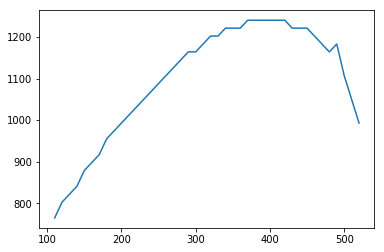

In [38]:
P_Max=2000
P_Min=100
T_Max=520
T_Min=100
#number of steps for each Temperature
n_steps=10
list_T,list_Sat_Pres=Phase_func(P_Max,P_Min,T_Max,T_Min,n_steps,z14)
plt.plot(list_T,list_Sat_Pres)
plt.show()

In [41]:


#z10={'C1': 0.2,'C2':0.3,'C10':0.50}
z12={'CO2': 0.02,'C1':0.40,'C2':0.06,'C3':0.08,'iC4':0.03,'nC4':0.04,'iC5':0.03,'nC5':0.04,'C6':0.05,'C7':0.25}
T_res=200
#Please ensure Pressure in Descending Order
#-----------------------------------------
#P_Diff=             [  2000,  1847,  1800,   1200,   800,  400, 200, 14.7]
#v_over_vres_obs=    [ 2.33,  2.37,  2.31,   1.77,  1.55, 1.35, 1.23, 1.00]
#v_gas_over_vres_obs=[ 1.77,  1.77,  1.69,   0.93,  0.59, 0.30,  0.14,  0]
#Please ensure Pressure in Descending Order
P_Diff=             [ 1200,1000,800, 600, 400, 200, 100, 14.7]
v_over_vres_obs=    [ 2.01,2.05,1.95,1.85,1.75,1.62,1.55,1.00]
v_gas_over_vres_obs=[ 1.20,1.20,1.05,0.89,0.75,0.57,0.45,0.00]



fluid='OIL'
print ('fluid=',fluid)
def DL_func(P_Diff,T_res,z):
 list_L1=[]
 list_liq_v1=[]
 list_vap_v1=[]
 liq_mol_frac=1.0
 # Cumulative Volume of Gas
 cum_gas_vol=0.0
 # Gas Volume Produced via depletion
 list_gas_vol=[]
 check_sum_func(z)
 #To be used in calculation of residual volume
 liq_mol_fracr=1.0
 for P in P_Diff:
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P,T_res,z)
  print ('P=',P,'T_res=',T_res,'L1=',L1,'V1=',V1)
  df_x1=pd.DataFrame(list(x1.items()),columns=['Comp','MolFr x'])
  df_y1=pd.DataFrame(list(y1.items()),columns=['Comp','MolFr y']) 
  df_z= pd.DataFrame(list(z.items()),columns=['Comp','MolFr z'])
  df_xy=pd.concat([df_x1,df_y1,df_z],axis=1)
  print (df_xy)

  # Create a list of liq volume at P
  list_liq_v1.append(liq_v1*liq_mol_frac)
  # Create a list of Gas volume at P
  list_vap_v1.append(vap_v1*liq_mol_frac)
  #Bg (BBL/Mscf)
  Bg=(0.0283*zeta_v1*(T_res+460)/P)*1000/5.615
  #print ('P=',P,'zeta_v1=',zeta_v1,'Bg=',Bg,'Mscf/BBL')
  #Create a list of Gas Volumes released at each stage
  list_gas_vol.append(vap_v1*liq_mol_frac/Bg)

  #Cumulative Volume of Gas
  cum_gas_vol= (cum_gas_vol+vap_v1*liq_mol_frac/Bg)

  list_L1.append(L1)
  liq_mol_frac=liq_mol_frac*L1
  z=x1

 #residual=r
 xr,yr,Lr,Vr,zeta_lr,zeta_vr,liq_vr,vap_vr=workflow(14.7,60,z)
 liq_vr=liq_vr*liq_mol_frac
 #print ('liq_vr=',liq_vr)
 v_over_vres=[]
 v_gas_over_vres=[]
 for liq_vol in list_liq_v1:
  #v/v_residual
  v_over_vres.append(liq_vol/liq_vr)
 gas_vol=cum_gas_vol
 for vol in list_gas_vol:
  gas_vol=gas_vol-vol
  v_gas_over_vres.append((gas_vol)/liq_vr)
    
  
 return (P_Diff,v_over_vres,v_gas_over_vres,list_L1)

(P_Diff,v_over_vres,v_gas_over_vres,list_L1)=DL_func(P_Diff,T_res,z14)

DiffLib= pd.DataFrame(list(zip(P_Diff,v_over_vres, v_gas_over_vres,list_L1)), 
               columns =[ 'Pressure(psia)','v/v_res(BBL/BBL)', 'vgas/v_res(Mscf/BBL)','Liquid Mole Fraction'])
DiffLib


fluid= OIL
sum of mole fraction= 1.00018
---Two Phases----
------Single Phase-------
------Inside While Loop--
P= 1200 T_res= 200 L1= 1.0 V1= 0.0
   Comp  MolFr x Comp  MolFr y Comp  MolFr z
0    N2  0.00066   N2        0   N2  0.00066
1   CO2  0.01761  CO2        0  CO2  0.01761
2    C1  0.20551   C1        0   C1  0.20551
3    C2  0.07086   C2        0   C2  0.07086
4    C3  0.07896   C3        0   C3  0.07896
5   iC4  0.02088  iC4        0  iC4  0.02088
6   nC4  0.04991  nC4        0  nC4  0.04991
7   iC5  0.02538  iC5        0  iC5  0.02538
8   nC5  0.03422  nC5        0  nC5  0.03422
9    C6  0.05280   C6        0   C6  0.05280
10   C7  0.08448   C7        0   C7  0.08448
11   C8  0.08708   C8        0   C8  0.08708
12   C9  0.04983   C9        0   C9  0.04983
13  C10  0.22200  C10        0  C10  0.22200
---Two Phases----
P= 1000 T_res= 200 L1= 0.9982770073115214 V1= 0.001722992688478638
   Comp   MolFr x Comp   MolFr y Comp  MolFr z
0    N2  0.000653   N2  0.004478   N2  0.00066


,Pressure(psia),v/v_res(BBL/BBL),vgas/v_res(Mscf/BBL),Liquid Mole Fraction
0,1200.0,1.872318,1.101492,1.000000
1,1000.0,1.884414,1.098200,0.998277
2,800.0,1.802110,0.953709,0.924258
3,600.0,1.723844,0.817009,0.922470
4,400.0,1.644559,0.681437,0.916647
5,200.0,1.545905,0.524017,0.894414
6,100.0,1.466677,0.410200,0.914647
7,14.7,1.076635,0.000000,0.663682


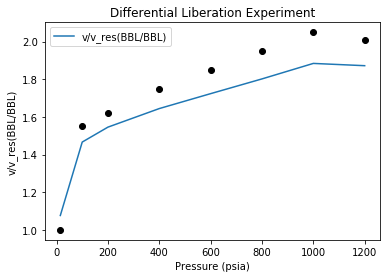

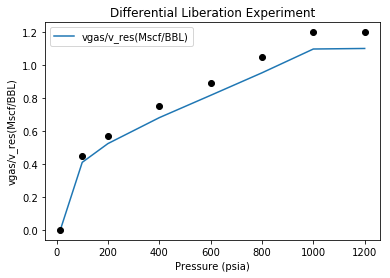

In [42]:
plt.plot(DiffLib['Pressure(psia)'],DiffLib['v/v_res(BBL/BBL)'])
plt.plot(P_Diff,v_over_vres_obs,marker='o',color='black',linewidth=0)
plt.title ('Differential Liberation Experiment')
plt.xlabel('Pressure (psia)')
plt.ylabel('v/v_res(BBL/BBL)')
plt.legend()
plt.show()
plt.plot(DiffLib['Pressure(psia)'],DiffLib['vgas/v_res(Mscf/BBL)'])
plt.plot(P_Diff,v_gas_over_vres_obs,marker='o',color='black',linewidth=0)
plt.title ('Differential Liberation Experiment')
plt.xlabel('Pressure (psia)')
plt.ylabel('vgas/v_res(Mscf/BBL)')
plt.legend()
plt.show()

In [21]:
# This function takes in list of separator Pressures, Separator Temperatures and composition
# Vapour from Each stage joins the Vapour Stream
# Liquid from Each stage is passed to the next stage.

def sep_func(P_sep_list, T_sep_list,z):
  list_x=[]
  list_y=[]
  list_liq_moles=[]
  list_vap_moles=[]
  list_liq_vol=[]
  list_vap_vol=[]
#----------------------------------
  if len(P_sep_list)!=len(T_sep_list):
   print ('ERROR: The length of the P_sep_list must be equal to T_sep_list')
  else:
   n=0
   #moles to the next stage
   moles_to_next=1
   while n< len(P_sep_list):
    print ('Sep_P=',P_sep_list[n],'T_sep=',T_sep_list[n])
    x,y,L,V,zeta_l, zeta_v, liq_v, vap_v=workflow(P_sep_list[n],T_sep_list[n],z)
    df_x1=pd.DataFrame(list(x.items()),columns=['Comp','MolFr x'])
    df_y1=pd.DataFrame(list(y.items()),columns=['Comp','MolFr y']) 
    df_z= pd.DataFrame(list(z.items()),columns=['Comp','MolFr z'])
    df_xy=pd.concat([df_x1,df_y1,df_z],axis=1)
    print (df_xy)
    list_x.append(x)
    list_y.append(y)
    liq_moles=moles_to_next*L
    vap_moles=moles_to_next*V
    #-----------------------------
    liq_vol=moles_to_next*liq_v
    #------------------------------
    list_liq_moles.append(liq_moles)
    list_vap_moles.append(vap_moles)
    
    z=x
    moles_to_next=moles_to_next*L
    n+=1
    #print ('liq_v=',liq_v,'vap_v=',vap_v)
   #Calculate Volume of Gas
   sum_vap_moles=sum(list_vap_moles)
   print('sum_vap_moles=', sum_vap_moles)
   #Vapour Volume in ft3
   #print ('zeta_v=',zeta_v,T_sep_list[n-1],P_sep_list[n-1])
   vap_vol=sum_vap_moles*zeta_v*10.73*(T_sep_list[n-1]+460)/P_sep_list[n-1]
  return(list_x,list_y,list_liq_moles,list_vap_moles,liq_vol,vap_vol)

In [22]:
P_sep_list=[100,14.7]
T_sep_list=[80,60]
z11={'N2':0.0135,'CO2':0.0107,'C1': 0.75,'C2':0.0892,'C3':0.0387,'iC4':0.0061,'nC4':0.0127,
     'iC5':0.004,'nC5':0.0046,'C6':0.0064,'C7':0.0096,'C8':0.0091,'C9':0.0059,'C10':0.0048,
      'C11':0.0037,'C16':0.0306}
#z={'C1':0.6,'C2':0.3,'C16':0.1}
sep_func(P_sep_list,T_sep_list,z10)

Sep_P= 100 T_sep= 80
---Two Phases----
  Comp   MolFr x Comp   MolFr y Comp  MolFr z
0   C1  0.016648   C1  0.447988   C1      0.2
1   C2  0.114268   C2  0.551207   C2      0.3
2  C10  0.869085  C10  0.000805  C10      0.5
Sep_P= 14.7 T_sep= 60
---Two Phases----
  Comp   MolFr x Comp   MolFr y Comp   MolFr z
0   C1  0.000934   C1  0.156524   C1  0.016648
1   C2  0.032596   C2  0.841271   C2  0.114268
2  C10  0.966470  C10  0.002205  C10  0.869085
sum_vap_moles= 0.48314029969734673


([{'C1': 0.016647552744814012,
   'C2': 0.11426763803009986,
   'C10': 0.8690848092250861},
  {'C1': 0.0009337652092700849,
   'C2': 0.032595822345289904,
   'C10': 0.96647041244544}],
 [{'C1': 0.44798782341911236,
   'C2': 0.5512067052985761,
   'C10': 0.00080547128231156},
  {'C1': 0.1565242048162191,
   'C2': 0.8412712404870839,
   'C10': 0.002204554696697233}],
 [0.574923883252176, 0.5168597003026533],
 [0.425076116747824, 0.05806418294952273],
 1.5109496348896272,
 181.89980930546605)

In [24]:
def MW_func(z):
 MW_mix=0.0
 for i in z:
  MW_mix=MW_mix+z[i]*MW[i]
  #print ('MW_mix=',MW_mix)
 return(MW_mix)

def density(P, T_F,z):
 (xlist,ylist,L,V,zeta_l, zeta_v, liq_v, vap_v)=workflow(P,T_F,z)
 # Critical densities from LBC1
 print ('I am in density')
 #print ('xlist=',xlist)
 #print ('ylist=',ylist)
 print ('L=',L,'V=',V)
 #print ('liq_v=',liq_v, 'vap_v=',vap_v)
 if L>0:
  liq_den_c=rhocfunc(xlist)
  #print ('liq_den_c=',liq_den_c)
  Mw_liq=MW_func(xlist)
  #liquid density lb/ft3
  liq_den1=Mw_liq*L/liq_v
  print ('liq-den1=',liq_den1)
  #liquid density g/cm3
  liq_den2=liq_den1/62.4
  # molar density lb-moles/ft3
  liq_den3=L/liq_v
  print ('liq_den3=',liq_den3,'lb-moles/ft3')
  #reduced density
  liq_red_den= liq_den3/liq_den_c
  print ('liq_red_den=',liq_red_den)
 if V>0:
  vap_den_c=rhocfunc(ylist)
  Mw_vap=MW_func(ylist)
  #vap_denisty lb/ft3
  vap_den1=Mw_vap*V/vap_v
  #vap_density g/cm3
  vap_den2=vap_den1/62.4
  # molar denstiy lb_moles/ft3
  vap_den3=V/vap_v
  print ('vap_den3=',vap_den3)
  #reduced density
  vap_red_den= vap_den3/vap_den_c
  print ('vap_red_den=',vap_red_den)
 if V==0:
  vap_den1=liq_den1
  vap_den2=liq_den2
  vap_red_den=liq_red_den
 if L==0:
  liq_den1=vap_den1
  liq_den2=vap_den2
  liq_red_den=vap_red_den
 
 return (liq_den1,liq_den2,liq_red_den,vap_den1,vap_den2,vap_red_den)

def epsillionifunc(z):
# Equation 10.44
 epsillioni={}
 for i in z:
  #print ('MW=',MW[i], 'Tc=', Tc[i], 'Pc=', Pc[i])
  epsillioni[i]=Tc[i]**(1/6)/mt.sqrt(MW[i])/Pc[i]**(2/3)
 return (epsillioni)

def Trfunc(z,T_F):
 T_R=T_F+460
 Tr={}
 for i in z:
  Tr[i]=(T_R/Tc[i])
 return (Tr)

def eta_i_starfunc(z,T_F):
 Tr=Trfunc(z,T_F)
 epsillioni=epsillionifunc(z)
 eta_i_star={}
 for i in z:
  if Tr[i]<=1.5:
   eta_i_star[i]=(34e-5*1/epsillioni[i]*Tr[i]**0.94)
  else:
   eta_i_star[i]=(17.78e-5/epsillioni[i]*(4.58*Tr[i]-1.67)**(5.0/8))
 #print (i,eta_i_star)
 return (eta_i_star)


def eta_starfunc(z,T_F):
 eta_i_star=eta_i_starfunc(z,T_F)
 eta_star=0.0
 num=0.0
 den=0.0
 for i in z:
  #numerator  
  num=num+z[i]*eta_i_star[i]*mt.sqrt(MW[i])
  #denominator
  den=den+z[i]*mt.sqrt(MW[i])
 eta_star=num/den
 return (eta_star)


def rhocfunc(z):
# Equation 10.39
 RHOc_mix=0.0
 den=0.0
 for i in z:
  #denominator
  den=den+(z[i]*Vc[i])
 RHOc_mix= 1/den
 return (RHOc_mix)

def epsillionfunc(z):
# Eqauation 10.38
 num=0.0
 den1=0.0
 den2=0.0
 for i in z:
  num=num+z[i]*Tc[i]
  den1=den1+z[i]*MW[i]
  den2=den2+z[i]*Pc[i]
 epsillion=num**(1/6)/den1**(1/2)/den2**(2/3)
 return (epsillion)


def lbc_visc(P, T_F,z):
  (xlist,ylist,L,V,zeta_l,zeta_v,liq_v,vap_v)=workflow(P,T_F,z)
  print ('-----------LBC Viscosity------------')
 # print ('Pressure=',P)
 # print ('xlsit=',xlist)
 # print ('ylist=',ylist)
#Table 10.3
  a1=0.1023
  a2=0.023364
  a3=0.058533
  a4=-0.040758
  a5=0.0093324
  liq_den1,liq_den2,liq_red_den,vap_den1,vap_den2,vap_red_den=density(P,T_F,z)
  print ('from density')
  print ('liq_red_den=',liq_red_den,'vap_red_den=',vap_red_den)
  #liquid_viscosity
  if L>0:
   #temporary variables visc_liq1,visc_liq2,visc_liq3,visc_liq4
   visc_liq1=a1+a2*liq_red_den+a3*liq_red_den**2+a4*liq_red_den**3+a5*liq_red_den**4
   visc_liq2= visc_liq1**4
   visc_liq3= visc_liq2-1e-4
   visc_liq4= visc_liq3/epsillionfunc(xlist)
   #liquid_viscosity
   visc_liq= visc_liq4+eta_starfunc(xlist,T_F)
   print ('visc_liq=',visc_liq)
   #-----------------------------------------------
   print ("Undersaturated Viscosity")
   
   liq_den1_us,liq_den2_us,liq_red_den_us,vap_den1_us,vap_den2_us,vap_red_den_us=density(max(P_list),T_F,xlist)
   visc_liq1_us=a1+a2*liq_red_den_us+a3*liq_red_den_us**2+a4*liq_red_den_us**3+a5*liq_red_den_us**4
   visc_liq2_us= visc_liq1_us**4
   visc_liq3_us= visc_liq2_us-1e-4
   visc_liq4_us= visc_liq3_us/epsillionfunc(xlist)
   #liquid_viscosity
   visc_liq_us= visc_liq4_us+eta_starfunc(xlist,T_F)
   print ('visc_liq_us=',visc_liq_us)
   print ('L=',L)
   #------------------------------------------
  if V>0:
   print ('V>0')
  #temporary variables visc_vap1,visc_vap2,visc_vap3,visc_vap4
   visc_vap1=a1+a2*vap_red_den+a3*vap_red_den**2+a4*vap_red_den**3+a5*vap_red_den**4
   visc_vap2= visc_vap1**4
   visc_vap3= visc_vap2-1e-4
   visc_vap4= visc_vap3/epsillionfunc(ylist)
   #vapour viscosty
   visc_vap=visc_vap4+eta_starfunc(ylist,T_F)
   print ('vap_red_den=',vap_red_den)
   print ('visc_vap=',visc_vap)
  if L==0.0:
    visc_liq=visc_vap
    visc_liq_us=visc_vap
  if V==0.0:
    visc_vap=visc_liq
    visc_liq_us=visc_liq
    
  return (visc_liq,visc_vap,visc_liq_us)

In [50]:

def blackoil_func (z, T_F, P_Diff,P_Sep_list,T_Sep_list):
 print ('z=',z)
 Bo=[]
 Bg=[]
 Rs=[]
 visco=[]
 viscg=[]
 list_L1=[]
 P_Gas=[]
 liq_mol_frac=1.0
 moles_L=1.0
 moles_V=1.0
 print ('nums_stages=',len(P_Sep_list))
 for P in P_Diff:
  #Res Condition
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P,T_res,z)
  print('liq_v1=',liq_v1,'vap_v1=',vap_v1)
  #Sep Condition
  list_x,list_y,list_liq_moles,list_vap_moles,liq_vol_sep,vap_vol_sep=sep_func(P_Sep_list,T_Sep_list,x1)
  moles_L=moles_L*L1
  liq_vol_sep=liq_vol_sep*moles_L*L1
  vap_vol_sep=vap_vol_sep*moles_L*L1
  liq_v1=liq_v1*moles_L
  print ('P=',P,'T_res=',T_F,'L1=',L1,'V1=',V1,'moles_L=',moles_L,'liq_vol_sep=',liq_vol_sep,\
         'vap_vol_sep=',vap_vol_sep)
  #Bo (BBL/STB)
  Bo.append(liq_v1/liq_vol_sep)
  #Rs (Mscf/STB)
  Rs.append((vap_vol_sep/liq_vol_sep)*5.615/1000)
  # Viscosity Calculation
  list_L1.append(L1)
  visc_liq,visc_vap,visc_liq_us=lbc_visc(P,T_F,z)
  visco.append(visc_liq)
  if L1<1.0:
   print ('ok1,L1=',L1)
   #Calculation of Gas Properties for PVDG
   P_Gas.append(P)
   viscg.append(visc_vap)
   #Bg.append(vap_vol/vap_vol_sys)
   Bg.append(0.02826*zeta_v1*(T_res+460)/P)
  z=x1
 return (Bo,Rs,visco,list_L1,Bg,viscg,P_Gas)
T_res=200
P_sep_list=[14.7]
T_sep_list=[60]
if fluid=='OIL':
 Bo,Rs,visco,list_L1,Bg,viscg,P_Gas=blackoil_func(z14,T_res,P_Diff,P_sep_list,T_sep_list)
 PVTO= pd.DataFrame(list(zip(Rs,P_Diff,Bo,visco,list_L1)), 
               columns =[ 'Rs(Mscf/STB)','Pressure(psia)','Bo(BBL/STB)','visco(cp)','Liquid Mole Fraction'])
 PVDG=pd.DataFrame(list(zip(P_Gas,Bg,viscg)),\
                  columns=['Pressure(psia)','Bg(Mscf/STB)','viscg(cp)'])
 PVTO=PVTO.iloc[::-1]
 print (PVTO)
 PVTO.to_excel('PVTO_Oil.xls')
 PVDG=PVDG.iloc[::-1]
 print (PVDG)
 PVDG.to_excel('PVDG_Oil.xls')
#print ('P=',P_Diff)
#print('Rs=',Rs)
#print ('Bo=',Bo) 
#print ('P_Gas=',P_Gas)
#print ('Bg=',Bg)
#print ('viscg=',viscg)
#print ('visco=',visco)
#print ('L1=',list_L1)

z= {'N2': 0.00066, 'CO2': 0.01761, 'C1': 0.20551, 'C2': 0.07086, 'C3': 0.07896, 'iC4': 0.02088, 'nC4': 0.04991, 'iC5': 0.02538, 'nC5': 0.03422, 'C6': 0.0528, 'C7': 0.08448, 'C8': 0.08708, 'C9': 0.04983, 'C10': 0.222}
nums_stages= 1
---Two Phases----
------Single Phase-------
------Inside While Loop--
liq_v1= 2.0862655275225856 vap_v1= 0.0
Sep_P= 14.7 T_sep= 60
---Two Phases----
   Comp   MolFr x Comp   MolFr y Comp  MolFr z
0    N2  0.000003   N2  0.001566   N2  0.00066
1   CO2  0.003654  CO2  0.036848  CO2  0.01761
2    C1  0.002892   C1  0.484818   C1  0.20551
3    C2  0.006221   C2  0.159965   C2  0.07086
4    C3  0.023287   C3  0.155705   C3  0.07896
5   iC4  0.012642  iC4  0.032236  iC4  0.02088
6   nC4  0.038130  nC4  0.066149  nC4  0.04991
7   iC5  0.029687  iC5  0.019442  iC5  0.02538
8   nC5  0.043773  nC5  0.021051  nC5  0.03422
9    C6  0.082810   C6  0.011432   C6  0.05280
10   C7  0.141037   C7  0.006517   C7  0.08448
11   C8  0.148065   C8  0.003012   C8  0.08708
12   C9 

liq_den3= 0.3749054181873503 lb-moles/ft3
liq_red_den= 2.818445784825895
visc_liq_us= 1.721106652692951
L= 0.6636819042081212
V>0
vap_red_den= 0.01040496971950804
visc_vap= 0.048994985361964546
ok1,L1= 0.6636819042081212
   Rs(Mscf/STB)  Pressure(psia)  Bo(BBL/STB)  visco(cp)  Liquid Mole Fraction
7      0.000000            14.7     1.076635   1.124276              0.663682
6      0.034250           100.0     1.113063   0.983587              0.914647
5      0.116655           200.0     1.168285   0.929689              0.894414
4      0.250541           400.0     1.253109   0.854103              0.916647
3      0.371271           600.0     1.326426   0.792955              0.922470
2      0.492892           800.0     1.398967   0.737769              0.924258
1      0.620632          1000.0     1.474550   0.686624              0.998277
0      0.623540          1200.0     1.465333   0.709293              1.000000
   Pressure(psia)  Bg(Mscf/STB)  viscg(cp)
6            14.7      1.238214   

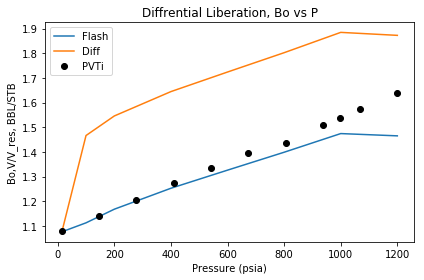

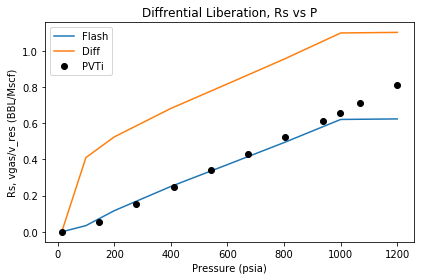

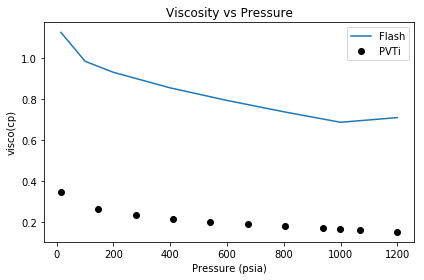

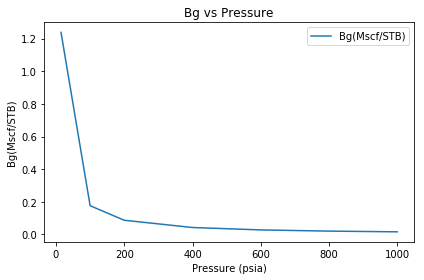

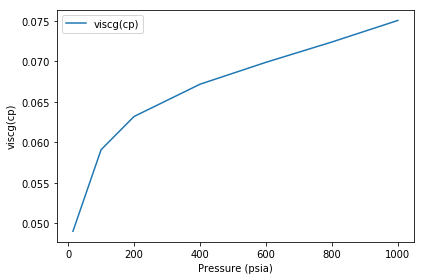

In [51]:
#P_Obs=             [  1594,  1494,  1300, 1000,  50,     14.7]
#Bo_Obs=            [  1.542, 1.548, 1.48, 1.384, 1.0943, 1.0911 ]
#Rs_Obs=            [  0.75,  0.750, 0.64, 0.478, 0.0027, 0.0000 ]
#visco_Obs=         [  0.15,  0.14,  0.15, 0.1792,0.3157,0.71983]
P_Obs=             [  1200,1068.3,996.8,936.6,804.9,673.2,541.5,409.8,278.1,146.4,14.7]
Bo_Obs=            [ 1.638,1.573,1.539,1.511,1.4352,1.394,1.335,1.274,1.207,1.14,1.08]
Rs_Obs=            [  0.811,0.709,0.656,0.613,0.521,0.430,0.34,0.249,0.154,0.055,0.00]
visco_Obs=         [  0.1533,0.162,0.1668,0.1710,0.1806,0.1912,0.2031,0.2170,0.2348,0.2620,0.3467]


plt.plot(PVTO['Pressure(psia)'],PVTO['Bo(BBL/STB)'],label='Flash')
plt.plot(DiffLib['Pressure(psia)'],DiffLib['v/v_res(BBL/BBL)'],label='Diff')
plt.plot(P_Obs, Bo_Obs,marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure (psia)')
plt.ylabel('Bo,V/V_res, BBL/STB')
plt.title ('Diffrential Liberation, Bo vs P')
plt.tight_layout()
plt.legend()
plt.show()
#
plt.plot(PVTO['Pressure(psia)'],PVTO['Rs(Mscf/STB)'],label='Flash')
plt.plot(DiffLib['Pressure(psia)'],DiffLib['vgas/v_res(Mscf/BBL)'],label='Diff')
plt.plot(P_Obs, Rs_Obs,marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure (psia)')
plt.ylabel('Rs, vgas/v_res (BBL/Mscf)')
plt.title ('Diffrential Liberation, Rs vs P')
plt.tight_layout()
plt.legend()
plt.show()
#
plt.plot(PVTO['Pressure(psia)'],PVTO['visco(cp)'],label='Flash')
plt.plot(P_Obs, visco_Obs,marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure (psia)')
plt.ylabel('visco(cp)')
plt.title ('Viscosity vs Pressure')
plt.tight_layout()
plt.legend()
plt.show()
#
plt.plot(PVDG['Pressure(psia)'],PVDG['Bg(Mscf/STB)'])
plt.xlabel('Pressure (psia)')
plt.ylabel('Bg(Mscf/STB)')
plt.title ('Bg vs Pressure')
plt.tight_layout()
plt.legend()
plt.show()
#
plt.plot(PVDG['Pressure(psia)'], PVDG['viscg(cp)'])
plt.xlabel('Pressure (psia)')
plt.ylabel('viscg(cp)')
plt.tight_layout()
plt.legend()
plt.show()

In [52]:
#15-11-2020
# This function is now complete
#---------------------------------
#11-11-2020
# Need to confirm if the calculation for moles removed is correct and then use it to 
# update the composition
#################
# 09-11-2020
# Need to figure out how to determine the Dew Point Pressure

fluid='GAS' 
print('fluid=',fluid)
z11={'N2':0.0135,'CO2':0.0107,'C1': 0.75,'C2':0.0892,'C3':0.0387,'iC4':0.0061,'nC4':0.0127,
     'iC5':0.004,'nC5':0.0046,'C6':0.0064,'C7':0.0096,'C8':0.0091,'C9':0.0059,'C10':0.0048,
      'C11':0.0037,'C16':0.0306}
P_CVD=    [6996, 6300, 5700, 5100, 4500, 3800, 3100,  2400,1700,  1000, 300]
vap_z_obs=[1.148,1.091,1.047,1.011,0.984,0.961,0.948,0.945,0.952, 0.968,0.989]
#So_obs=   [0,    0.044,0.092,0.125,0.147,0.159,0.162,0.157,0.150, 0.140,0.126]
So_obs=   [0,    0,        0,   0,0.102,0.139,0.142,0.137,0.127, 0.115,0.099]
moles_recovery= [0,0,      0,   0,0.062,0.177,0.305,0.444,0.592, 0.745,0.899]

check_sum_func(z11)

def CVD_func(P_CVD,T_res,z):
 kount=0
 kount2=0
 # vapour volume removed
 vap_vol_removed=0
 cum_vap_vol_removed=0
 # moles of Vapour removed
 moles_vap_removed=0
 cum_moles_vap_removed=0
 # sum of moles remaining at subsequent stages below dew point (L1+V1)
 sum_moles=1.0 
 # volume of saturated fluid: detemined after the first appearance of liquid
 sat_vol=0
 oil_sat=0
 list_L1=[]
 list_V1=[]
 list_liq_v1=[]
 list_vap_v1=[]
 list_moles_removed=[]
 list_cum_vol_removed=[]
 list_cum_moles_removed=[]
 list_oil_sat=[]
 liq_mol_frac=1.0

 for P in P_CVD:
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P,T_res,z)
  # This 'if' statement is only to store the volume, just below the Dew Point
  # After the 1st occurance of Liquid
  if L1>0.0 and kount<1:
   kount+=1
   sat_vol=vap_v1+liq_v1
   DewPoint=P
   print ('Dew Point=',P)
   print ('sat_vol=',sat_vol)

  # This 'if' statement is to help store the volume removed below Dew Point
  #kount2 2nd counter only such that removal process start one stage after
  # the stage where sat_vol is recorded
  kount2+=1
  if L1>0.0 and P<DewPoint:
   vap_v1=vap_v1*sum_moles
   liq_v1=liq_v1*sum_moles
   liq_moles=L1*sum_moles
   vap_moles=V1*sum_moles
   print ('Pressure=',P,'vap_v1=',vap_v1,'liq_v1=',liq_v1)
   #Vap Volume Removed= Volume of Liquid + Vapour at Pressure - Saturated Volume
   vap_vol_removed=(vap_v1+liq_v1)-sat_vol
   cum_vap_vol_removed+=vap_vol_removed
   #moles of vapour removed
   moles_vap_removed=(vap_vol_removed/vap_v1)*vap_moles
   cum_moles_vap_removed+=moles_vap_removed
   #moles of vapour remaining
   moles_vap_remain=vap_moles-moles_vap_removed
   #list_moles_removed.append(moles_vap_removed)
   vap_v1-=vap_vol_removed
   oil_sat=liq_v1/sat_vol
   print ('vap_vol_removed=',vap_vol_removed)
   #print ('L1=',L1,'V1=',V1)
   print ('moles_vap_remain=',moles_vap_remain)
   #print ('moles_vap_removed=',moles_vap_removed)
   print ('liq_moles=',liq_moles,'vap_moles=',vap_moles)
   sum_moles=(liq_moles+moles_vap_remain)
   for i in z:
    z[i]=(liq_moles*x1[i]+moles_vap_remain*y1[i])/sum_moles
   print ('-----','stage=',kount2,'----------------')
   df_x1=pd.DataFrame(list(x1.items()),columns=['Comp','MolFr x'])
   df_y1=pd.DataFrame(list(y1.items()),columns=['Comp','MolFr y']) 
   df_z= pd.DataFrame(list(z.items()),columns=['Comp','MolFr z'])
   df_xy=pd.concat([df_x1,df_y1,df_z],axis=1)
   print (df_xy)
   check_sum_func(z)
   #print ('sum_moles=',sum_moles)
  # Create a list of liq volume at P
  list_liq_v1.append(liq_v1)
  # Create a list of Gas volume at P
  #print ('vap_v1=',vap_v1)
  list_vap_v1.append(vap_v1)
  list_moles_removed.append(moles_vap_removed)
  list_cum_moles_removed.append(cum_moles_vap_removed)
  list_oil_sat.append(oil_sat)

  #Bg (BBL/Mscf)
  Bg=(0.0283*zeta_v1*(T_res+460)/P)*1000/5.615
  print ('P=',P,'zeta_v1=',zeta_v1,'Bg=',Bg,'Mscf/BBL')
  #Cumulative Volume of Gas
  cum_vap_vol_removed= (cum_vap_vol_removed/Bg)
  list_cum_vol_removed.append(cum_vap_vol_removed)

  list_L1.append(L1)
  list_V1.append(V1)
  
 return (P_CVD,list_liq_v1,list_vap_v1,list_L1,list_V1,list_oil_sat,list_cum_moles_removed,\
         list_cum_vol_removed)

(P_CVD,list_liq_v1,list_vap_v1,list_L1,list_V1,list_oil_sat,list_cum_moles_removed,\
           list_cum_vol_removed)=CVD_func(P_CVD,300,z11)

CVD= pd.DataFrame(list(zip(P_CVD,list_liq_v1, list_vap_v1,list_L1,list_V1,list_oil_sat,list_cum_moles_removed)), 
               columns =[ 'Pressure(psia)','list_liq_v1', 'list_vap_v1','Liquid Mole Fraction',
                         'Vapour Mole Fraction','Oil Sat.','cum_moles removed'])
#print (list_moles_removed)
#print (list_cum_vol_removed)
CVD



fluid= GAS
sum of mole fraction= 0.9996
---Two Phases----
------Single Phase-------
------Inside While Loop--
P= 6996 zeta_v1= 1.1768739518353422 Bg= 0.6443627361182483 Mscf/BBL
---Two Phases----
------Single Phase-------
------Inside While Loop--
P= 6300 zeta_v1= 1.1131486526408076 Bg= 0.6768039469391366 Mscf/BBL
---Two Phases----
------Single Phase-------
------Inside While Loop--
P= 5700 zeta_v1= 1.05912257677909 Bg= 0.7117404315309762 Mscf/BBL
---Two Phases----
------Single Phase-------
------Inside While Loop--
P= 5100 zeta_v1= 1.0064784462070842 Bg= 0.7559352023125021 Mscf/BBL
---Two Phases----
Dew Point= 4500
sat_vol= 1.7465978332585468
P= 4500 zeta_v1= 0.9581852395044573 Bg= 0.8156188040471701 Mscf/BBL
---Two Phases----
Pressure= 3800 vap_v1= 1.7413382047644417 liq_v1= 0.25451133786752905
vap_vol_removed= 0.2492517093734239
moles_vap_remain= 0.7526480804864932
liq_moles= 0.12162273343926222 vap_moles= 0.8783772665607378
----- stage= 6 ----------------
   Comp   MolFr x Comp   M

,Pressure(psia),list_liq_v1,list_vap_v1,Liquid Mole Fraction,Vapour Mole Fraction,Oil Sat.,cum_moles removed
0,6996,0.000000,1.372064,0.000000,1.000000,0.000000,0.000000
1,6300,0.000000,1.441142,0.000000,1.000000,0.000000,0.000000
2,5700,0.000000,1.515534,0.000000,1.000000,0.000000,0.000000
3,5100,0.000000,1.609639,0.000000,1.000000,0.000000,0.000000
4,4500,0.166334,1.580264,0.090090,0.909910,0.000000,0.000000
5,3800,0.254511,1.492086,0.121623,0.878377,0.145718,0.125729
6,3100,0.265932,1.480666,0.129386,0.870614,0.152257,0.265116
7,2400,0.257427,1.489171,0.132357,0.867643,0.147388,0.415822
8,1700,0.241108,1.505490,0.137350,0.862650,0.138044,0.574325
9,1000,0.220264,1.526334,0.148902,0.851098,0.126110,0.735687


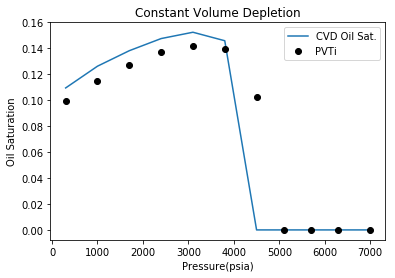

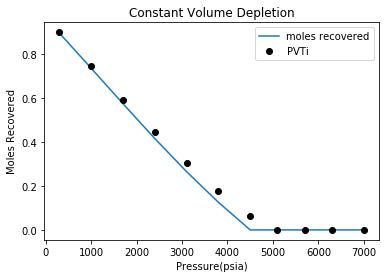

In [53]:

plt.plot(CVD['Pressure(psia)'],CVD['Oil Sat.'],label='CVD Oil Sat.')
plt.plot(P_CVD, So_obs,marker='o',color='black',linewidth=0,label='PVTi')

plt.xlabel('Pressure(psia)')
plt.ylabel('Oil Saturation')
plt.title ('Constant Volume Depletion')
plt.legend()
plt.show()
plt.plot(CVD['Pressure(psia)'],CVD['cum_moles removed'],label='moles recovered')
plt.plot(P_CVD, moles_recovery,marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure(psia)')
plt.ylabel('Moles Recovered')
plt.title ('Constant Volume Depletion')
plt.legend()

In [54]:
#This function generates PVTO_cond_func and PVTG_func for Gas Condensates
# This function is derived from CVD_func
# 16-11-2020
#Tomorrow work on PVTO and PVTO Undersaturated
 
z11={'N2':0.0135,'CO2':0.0107,'C1': 0.75,'C2':0.0892,'C3':0.0387,'iC4':0.0061,'nC4':0.0127,
     'iC5':0.004,'nC5':0.0046,'C6':0.0064,'C7':0.0096,'C8':0.0091,'C9':0.0059,'C10':0.0048,
      'C11':0.0037,'C16':0.0306}
P_CVD=    [6996, 6300, 5700, 4900, 4500, 3800, 3100,  2400,1700,  1000, 300]
fluid='GAS'
T_res=300

check_sum_func(z11)
P_sep_list=[100,14.7]
T_sep_list=[80,60]
# This function calulated PVTG Table for Gas Condensate
def Gas_Cond_func1(P_CVD,T_res,z):
 kount=0
 kount2=0
 # vapour volume removed
 vap_vol_removed=0
 cum_vap_vol_removed=0
 # moles of Vapour removed
 moles_vap_removed=0
 cum_moles_vap_removed=0
 # sum of moles remaining at subsequent stages below dew point (L1+V1)
 sum_moles=1.0 
 # volume of saturated fluid: detemined after the first appearance of liquid
 sat_vol=0
 oil_sat=0
 list_Rv=[]
 list_L1=[]
 list_V1=[]
 list_liq_v1=[]
 list_vap_v1=[]
 list_moles_removed=[]
 list_cum_vol_removed=[]
 list_cum_moles_removed=[]
 list_oil_sat=[]
 list_Bg=[]
 list_viscg=[]
 liq_mol_frac=1.0
 
 P_sat=Sat_Pres_func(max(P_CVD),14.7,T_res,10,z)
 x_sat,y_sat,L_sat,V_sat,zeta_l_sat,zeta_v_sat,liq_v_sat,vap_v_sat=workflow(P_sat,T_res,z)
 DewPoint=P_sat
 sat_vol=vap_v_sat+liq_v_sat
 print ('DewPoint=',DewPoint)
 print ('sat_vol=',sat_vol)

 for P in P_CVD:
  print('---------------------------')
  print('P=',P)
  print ('--------------------------')
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P,T_res,z)
  visc_liq,visc_vap,visc_liq_us=lbc_visc(P,T_res,z)
  list_viscg.append(visc_vap)

  list_x,list_y,list_liq_moles,list_vap_moles,liq_vol,vap_vol=sep_func(P_sep_list,T_sep_list,y1)

  
  #vap_vol in Mscf
  vap_vol=vap_vol/1000
  #liq_vol in STB
  liq_vol=liq_vol/5.615
  Rv= liq_vol/vap_vol
  list_Rv.append(Rv)
    
#--------------------------------------------------
  # This 'if' statement is only to store the volume, just below the Dew Point
  # After the 1st occurance of Liquid
  #if L1>0.0 and kount<1:
  # kount+=1
  # sat_vol=vap_v1+liq_v1
  # DewPoint=P
  #print ('Dew Point=',P_sat)
  #print ('sat_vol=',vap_v_sat)

  # This 'if' statement is to help store the volume removed below Dew Point
  #kount2 2nd counter only such that removal process start one stage after
  # the stage where sat_vol is recorded
  kount2+=1
  if L1>0.0 and P<DewPoint:
   vap_v1=vap_v1*sum_moles
   liq_v1=liq_v1*sum_moles
   liq_moles=L1*sum_moles
   vap_moles=V1*sum_moles
   #Vap Volume Removed= Volume of Liquid + Vapour at Pressure - Saturated Volume
   vap_vol_removed=(vap_v1+liq_v1)-sat_vol
   cum_vap_vol_removed+=vap_vol_removed
   #moles of vapour removed
   moles_vap_removed=(vap_vol_removed/vap_v1)*vap_moles
   cum_moles_vap_removed+=moles_vap_removed
   #moles of vapour remaining
   moles_vap_remain=vap_moles-moles_vap_removed
   #list_moles_removed.append(moles_vap_removed)
   vap_v1-=vap_vol_removed
   oil_sat=liq_v1/sat_vol
   print ('vap_vol_removed=',vap_vol_removed)
   #print ('L1=',L1,'V1=',V1)
   print ('moles_vap_remain=',moles_vap_remain)
   #print ('moles_vap_removed=',moles_vap_removed)
   print ('liq_moles=',liq_moles,'vap_moles=',vap_moles)
   sum_moles=(liq_moles+moles_vap_remain)
   for i in z:
    z[i]=(liq_moles*x1[i]+moles_vap_remain*y1[i])/sum_moles
   check_sum_func(z)
   #print ('sum_moles=',sum_moles)
  # Create a list of liq volume at P
  list_liq_v1.append(liq_v1)
  # Create a list of Gas volume at P
  #print ('vap_v1=',vap_v1)
  list_vap_v1.append(vap_v1)
  list_moles_removed.append(moles_vap_removed)
  list_cum_moles_removed.append(cum_moles_vap_removed)
  list_oil_sat.append(oil_sat)
  
  #Bg (BBL/Mscf)
  Bg=(0.0283*zeta_v1*(T_res+460)/P)*1000/5.615
  print ('P=',P,'zeta_v1=',zeta_v1,'Rv=',Rv,'STB/Mscf','Bg=',Bg,'Mscf/BBL')
  list_Bg.append(Bg)
  #Cumulative Volume of Gas
  cum_vap_vol_removed= (cum_vap_vol_removed/Bg)
  list_cum_vol_removed.append(cum_vap_vol_removed)

  list_L1.append(L1)
  list_V1.append(V1)
 print ('-------------------------------------------------')
 print ('Please remember to put the PVTG table in the format compliant with Eclipse')
 print ("Undersaturated Values of Rv,Viscg and Bg at highest Pressure by extrapolation:")
 print ('i)Add /')
 #P_CVD,Rv,Bg,viscg,list_L1 =Gas_Cond_func1(P_CVD,T_res,z11)


 return (P_CVD,list_Rv,list_Bg,list_viscg,list_L1)
if fluid=='GAS':
 P_CVD,Rv,Bg,viscg,list_L1 =Gas_Cond_func1(P_CVD,T_res,z11)

 PVTG=pd.DataFrame(list(zip(P_CVD,Rv,Bg,viscg)),columns=['Pressure(psia)','Rv(STB/Mscf)',\
                                                       'Bg(Mscf/BBL)','viscg(cp)'])
 #col,row=PVTG.shape
 #slash=[]
 #for i in range (0,col,1):
 # slash.append('/')
 # PVTG['slash']=slash
 PVTG=PVTG.iloc[::-1]
 print (PVTG)
 PVTG.to_excel('PVTG.xls')


sum of mole fraction= 0.9996
---Two Phases----
------Single Phase-------
------Inside While Loop--
6996 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
6297.87 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
5599.74 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
4901.61 L1= 0.0 V1= 1.0
---Two Phases----
4203.48 L1= 0.11301712715927215 V1= 0.8869828728407279
P_Max= 4901.61
P_Min= 4203.48
---Two Phases----
------Single Phase-------
------Inside While Loop--
4831.797 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
4761.9839999999995 L1= 0.0 V1= 1.0
---Two Phases----
4692.170999999999 L1= 0.052649122981177854 V1= 0.9473508770188221
P_Max= 4761.9839999999995
P_Min= 4692.170999999999
---Two Phases----
------Single Phase-------
------Inside While Loop--
4755.002699999999 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside

---Two Phases----
-----------LBC Viscosity------------
---Two Phases----
I am in density
L= 0.09009023293859852 V= 0.9099097670614015
liq-den1= 27.908860730711037
liq_den3= 0.5416218246342381 lb-moles/ft3
liq_red_den= 1.917079584007073
vap_den3= 0.5757961823261769
vap_red_den= 1.2900819129862127
from density
liq_red_den= 1.917079584007073 vap_red_den= 1.2900819129862127
visc_liq= 0.3332875515427982
Undersaturated Viscosity
---Two Phases----
------Single Phase-------
------Inside While Loop--
I am in density
L= 0.0 V= 1.0
vap_den3= 0.5576635601105553
vap_red_den= 1.9738595773067475
visc_liq_us= 0.35460687477002567
L= 0.09009023293859852
V>0
vap_red_den= 1.2900819129862127
visc_vap= 0.17208221517567235
Sep_P= 100 T_sep= 80
---Two Phases----
   Comp   MolFr x Comp   MolFr y Comp   MolFr z
0    N2  0.000206   N2  0.014790   N2  0.013850
1   CO2  0.005265  CO2  0.010895  CO2  0.010532
2    C1  0.028576   C1  0.813550   C1  0.762950
3    C2  0.019894   C2  0.093826   C2  0.089060
4    C3  0.

   Comp   MolFr x Comp       MolFr y Comp   MolFr z
0    N2  0.000200   N2  1.483048e-02   N2  0.014465
1   CO2  0.005234  CO2  1.071098e-02  CO2  0.010574
2    C1  0.029312   C1  8.130316e-01   C1  0.793434
3    C2  0.019505   C2  9.263752e-02   C2  0.090809
4    C3  0.027672   C3  3.807977e-02   C3  0.037820
5   iC4  0.009956  iC4  5.623192e-03  iC4  0.005732
6   nC4  0.028338  nC4  1.127440e-02  nC4  0.011701
7   iC5  0.019035  iC5  3.072950e-03  iC5  0.003472
8   nC5  0.027223  nC5  3.321871e-03  nC5  0.003920
9    C6  0.079231   C6  3.071098e-03   C6  0.004976
10   C7  0.170507   C7  2.398625e-03   C7  0.006602
11   C8  0.179119   C8  1.181985e-03   C8  0.005632
12   C9  0.114862   C9  2.671195e-04   C9  0.003133
13  C10  0.084062  C10  7.416248e-05  C10  0.002174
14  C11  0.055471  C11  1.858082e-05  C11  0.001405
15  C16  0.150077  C16  4.481412e-07  C16  0.003753
Sep_P= 14.7 T_sep= 60
---Two Phases----
   Comp   MolFr x Comp       MolFr y Comp   MolFr z
0    N2  0.000007   N2  

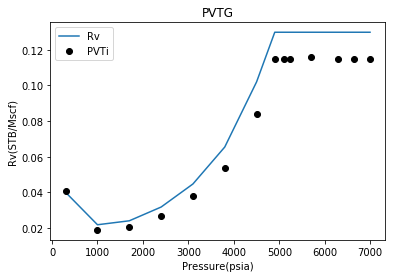

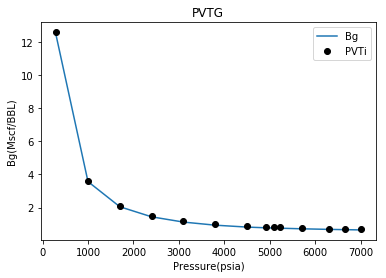

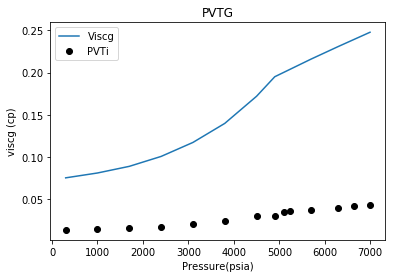

In [56]:
P_obs=[300  ,1000    ,1700   ,2400  ,3100 , 3800, 4500, 4909, 5100, 5232, 5700, 6300, \
       6648,6996]
Rv_obs=   [0.041,0.019 ,0.0207, 0.027,0.038,0.054, 0.084,0.115, 0.115, 0.115, 0.116, 0.115,\
      0.115,0.115]
Bg_obs=   [12.6, 3.61,   2.11,  1.485, 1.18
           ,0.9858,0.8759,0.8399,0.8240,0.817, 0.780, 0.713,\
       0.724,0.702]
viscg_obs=[0.014,0.015,   0.016,  0.018, 0.021,0.025, 0.030, 0.031, 0.035, 0.036, 0.038, 0.040,\
       0.042,0.043]

plt.plot(PVTG['Pressure(psia)'],PVTG['Rv(STB/Mscf)'],label='Rv')
plt.plot(P_obs, Rv_obs,marker='o',color='black',linewidth=0,label='PVTi')

plt.xlabel('Pressure(psia)')
plt.ylabel('Rv(STB/Mscf)')
plt.title ('PVTG')
plt.legend()
plt.show()

plt.plot(PVTG['Pressure(psia)'],PVTG['Bg(Mscf/BBL)'],label='Bg')
plt.plot(P_obs, Bg_obs,marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure(psia)')
plt.ylabel('Bg(Mscf/BBL)')
plt.title ('PVTG')
plt.legend()
plt.show()

plt.plot(PVTG['Pressure(psia)'],PVTG['viscg(cp)'],label='Viscg')
plt.plot(P_obs, viscg_obs,marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure(psia)')
plt.ylabel('viscg (cp)')
plt.title ('PVTG')
plt.legend()
plt.show()


In [55]:
#This function determines PVTO for Gas Condensate
#Its working for Saturated values: Tomorrow add functionality for Undersaturated
# 22-11-2020
 
z11={'N2':0.0135,'CO2':0.0107,'C1': 0.75,'C2':0.0892,'C3':0.0387,'iC4':0.0061,'nC4':0.0127,
     'iC5':0.004,'nC5':0.0046,'C6':0.0064,'C7':0.0096,'C8':0.0091,'C9':0.0059,'C10':0.0048,
      'C11':0.0037,'C16':0.0306}
P_CVD=    [6996, 6300, 5700, 4900, 4500, 3800, 3100,  2400,1700,  1000, 300]
T_res=300

check_sum_func(z11)
P_sep_list=[100,14.7]
T_sep_list=[80,60]
# This function calulated PVTG Table for Gas Condensate
def Gas_Cond_func2(P_CVD,T_res,z):
 kount=0
 kount2=0
 # vapour volume removed
 vap_vol_removed=0
 cum_vap_vol_removed=0
 # moles of Vapour removed
 moles_vap_removed=0
 cum_moles_vap_removed=0
 # sum of moles remaining at subsequent stages below dew point (L1+V1)
 sum_moles=1.0 
 # volume of saturated fluid: detemined after the first appearance of liquid
 sat_vol=0
 oil_sat=0
 #list_P is to store values of Pressures below the Dew Point
 list_P=[]
 list_Rs=[]
 list_L1=[]
 list_V1=[]
 list_liq_v1=[]
 list_vap_v1=[]
 list_moles_removed=[]
 list_cum_vol_removed=[]
 list_cum_moles_removed=[]
 list_oil_sat=[]
 list_Bg=[]
 list_Bo=[]
 list_visco=[]
 list_Bo_us=[]
 list_visco_us=[]
 list_P_us=[]
 liq_mol_frac=1.0

 P_sat=Sat_Pres_func(max(P_CVD),14.7,T_res,10,z)
 x_sat,y_sat,L_sat,V_sat,zeta_l_sat,zeta_v_sat,liq_v_sat,vap_v_sat=workflow(P_sat,T_res,z)
 DewPoint=P_sat
 sat_vol=vap_v_sat+liq_v_sat
 print ('DewPoint=',DewPoint)
 print ('sat_vol=',sat_vol)


 for P in P_CVD:
  x1,y1,L1,V1,zeta_l1,zeta_v1,liq_v1,vap_v1=workflow(P,T_res,z)
#--------------------------------------------------
  # This 'if' statement is only to store the volume, just below the Dew Point
  # After the 1st occurance of Liquid
  #if L1>0.0 and kount<1:
  # kount+=1
  # sat_vol=vap_v1+liq_v1
  # DewPoint=P
  # print ('Dew Point=',P)
  # print ('sat_vol=',sat_vol)

  # This 'if' statement is to help store the volume removed below Dew Point
  #kount2 2nd counter only such that removal process start one stage after
  # the stage where sat_vol is recorded
  kount2+=1
  if L1>0.0 and P<DewPoint:
   vap_v1=vap_v1*sum_moles
   liq_v1=liq_v1*sum_moles
   liq_moles=L1*sum_moles
   vap_moles=V1*sum_moles
   print ('Pressure=',P,'vap_v1=',vap_v1,'liq_v1=',liq_v1)
   #Vap Volume Removed= Volume of Liquid + Vapour at Pressure - Saturated Volume
   vap_vol_removed=(vap_v1+liq_v1)-sat_vol
   cum_vap_vol_removed+=vap_vol_removed
   #moles of vapour removed
   moles_vap_removed=(vap_vol_removed/vap_v1)*vap_moles
   cum_moles_vap_removed+=moles_vap_removed
   #moles of vapour remaining
   moles_vap_remain=vap_moles-moles_vap_removed
   #list_moles_removed.append(moles_vap_removed)
   vap_v1-=vap_vol_removed
   oil_sat=liq_v1/sat_vol
   print ('vap_vol_removed=',vap_vol_removed)
   #print ('L1=',L1,'V1=',V1)
   print ('moles_vap_remain=',moles_vap_remain)
   #print ('moles_vap_removed=',moles_vap_removed)
   print ('liq_moles=',liq_moles,'vap_moles=',vap_moles)
   sum_moles=(liq_moles+moles_vap_remain)
   #The following lines determine the Separator Output
   list_x,list_y,list_liq_moles,list_vap_moles,liq_vol,vap_vol=sep_func(P_sep_list,T_sep_list,x1)
  
   #liq_vol x liq_moles because liq_v1 has been multiplied by liq_moles above
   Bo=liq_v1/(liq_vol*liq_moles)

   list_Bo.append(Bo)
   #vap_vol in Mscf
   vap_vol=vap_vol/1000
   #liq_vol in STB
   liq_vol=liq_vol/5.615
   Rs= vap_vol/liq_vol
   list_Rs.append(Rs)
   print ('----------------------------')
   print ('P=',P,'Bo=',Bo,'Rs=',Rs)
   #viscosity calcuation
   visc_liq,visc_vap,visc_liq_us=lbc_visc(P,T_res,z)
   list_visco.append(visc_liq)
   list_visco_us.append(visc_liq_us)
   list_P.append(P)
   #The following lines are to develop the Undersaturated lines
   #_us is for undersaturated
   x_us,y_us,L_us,V_us,zeta_l_us,zeta_v_us,liq_v_us,vap_v_us=workflow(max(P_CVD),T_res,x1)
   #The workflow is designed to assign any single phase fluid as Gas therefore for Bo_us calculation
   # liq_v_us+vap_v_Us
   # And divided by 5.615 as liq_vol is already divided by 5.615
   Bo_us=(liq_v_us+vap_v_us)/5.615/liq_vol
   list_Bo_us.append(Bo_us)
   list_P_us.append(max(P_CVD))
    
   for i in z:
    z[i]=(liq_moles*x1[i]+moles_vap_remain*y1[i])/sum_moles
   print ('Stage=',kount2,'Pressure=',P,'psia','Temp=', T_res,'Degree F')
   print ( 'Liq Moles=',liq_moles,'Vap_moles remain=',moles_vap_remain)
   
   df_x1=pd.DataFrame(list(x1.items()),columns=['Comp','MolFr x'])
   df_y1=pd.DataFrame(list(y1.items()),columns=['Comp','MolFr y']) 
   df_z= pd.DataFrame(list(z.items()),columns=['Comp','MolFr z'])
   df_xy=pd.concat([df_x1,df_y1,df_z],axis=1)
   print (df_xy)

   check_sum_func(z)
   #print ('sum_moles=',sum_moles)
  # Create a list of liq volume at P
  list_liq_v1.append(liq_v1)
  # Create a list of Gas volume at P
  #print ('vap_v1=',vap_v1)
  list_vap_v1.append(vap_v1)
  list_moles_removed.append(moles_vap_removed)
  list_cum_moles_removed.append(cum_moles_vap_removed)
  list_oil_sat.append(oil_sat)
  
  #Bg (BBL/Mscf)
  Bg=(0.0283*zeta_v1*(T_res+460)/P)*1000/5.615

  list_Bg.append(Bg)
  #Cumulative Volume of Gas
  cum_vap_vol_removed= (cum_vap_vol_removed/Bg)
  list_cum_vol_removed.append(cum_vap_vol_removed)

  list_L1.append(L1)
  list_V1.append(V1)

 
  #PVTO=PVTO.drop(columns=['L1_list'])
  print ('--Please manually edit the PVTO') 
  print ('--(i) remove RS values from the first column, saturated values')
  print ('--(ii) And add a slash at the end of the same row')
  print ('--These issues will be fixed in future versions')

 return (list_P,list_Rs,list_Bo,list_visco,list_P_us,list_Bo_us,list_visco_us)
if fluid=='GAS':
 P,Rs,Bo,visco,P_us,Bo_us,visco_us =Gas_Cond_func2(P_CVD,T_res,z11)
 PVTO_s=pd.DataFrame(list(zip(Rs,P,Bo,visco)),columns=['Rs(Mscf/STB)','Pressure(psia)',\
                                                      'Bo(BBL/STB)','visco(cp)'])
 PVTO_us=pd.DataFrame(list(zip(Rs,P_us,Bo_us,visco_us)),columns=['Rs(Mscf/STB)','Pressure(psia)',
                                                      'Bo(BBL/STB)','visco(cp)'])
 PVTO_s=PVTO_s.iloc[::-1]
 PVTO_s
 PVTO_us=PVTO_us.iloc[::-1]
 PVTO_us

 PVTO_gas= pd.concat([PVTO_s, PVTO_us],sort=False)
 PVTO_gas.sort_values(by='Rs(Mscf/STB)',inplace=True)
 PVTO_gas
 PVTO_gas.to_excel('PVTO_gas.xlsx')
 print (PVTO_gas)




sum of mole fraction= 0.9996
---Two Phases----
------Single Phase-------
------Inside While Loop--
6996 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
6297.87 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
5599.74 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
4901.61 L1= 0.0 V1= 1.0
---Two Phases----
4203.48 L1= 0.11301712715927215 V1= 0.8869828728407279
P_Max= 4901.61
P_Min= 4203.48
---Two Phases----
------Single Phase-------
------Inside While Loop--
4831.797 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside While Loop--
4761.9839999999995 L1= 0.0 V1= 1.0
---Two Phases----
4692.170999999999 L1= 0.052649122981177854 V1= 0.9473508770188221
P_Max= 4761.9839999999995
P_Min= 4692.170999999999
---Two Phases----
------Single Phase-------
------Inside While Loop--
4755.002699999999 L1= 0.0 V1= 1.0
---Two Phases----
------Single Phase-------
------Inside

15  C16  0.161304  C16  0.012505  C16  0.033553
sum of mole fraction= 0.9996
--Please manually edit the PVTO
--(i) remove RS values from the first column, saturated values
--(ii) And add a slash at the end of the same row
--These issues will be fixed in future versions
---Two Phases----
Pressure= 3100 vap_v1= 1.740453287693848 liq_v1= 0.25919939453836227
vap_vol_removed= 0.3190908886858048
moles_vap_remain= 0.5968626856902137
liq_moles= 0.1102513514058304 vap_moles= 0.7308562716561872
Sep_P= 100 T_sep= 80
---Two Phases----
   Comp   MolFr x Comp   MolFr y Comp   MolFr z
0    N2  0.000154   N2  0.010856   N2  0.006382
1   CO2  0.007915  CO2  0.016515  CO2  0.012919
2    C1  0.026475   C1  0.764635   C1  0.456022
3    C2  0.026828   C2  0.126263   C2  0.084691
4    C3  0.039437   C3  0.054193   C3  0.048023
5   iC4  0.012121  iC4  0.006833  iC4  0.009044
6   nC4  0.031253  nC4  0.012509  nC4  0.020346
7   iC5  0.015044  iC5  0.002443  iC5  0.007712
8   nC5  0.019002  nC5  0.002341  nC5  

Pressure= 300 vap_v1= 5.5565262455152284 liq_v1= 0.18589841259470388
vap_vol_removed= 4.061862864563527
moles_vap_remain= 0.05663221247624847
liq_moles= 0.04415587664901398 vap_moles= 0.2105346119910314
Sep_P= 100 T_sep= 80
---Two Phases----
   Comp   MolFr x Comp   MolFr y Comp   MolFr z
0    N2  0.000186   N2  0.013125   N2  0.000534
1   CO2  0.003167  CO2  0.006597  CO2  0.003259
2    C1  0.029771   C1  0.870666   C1  0.052412
3    C2  0.016298   C2  0.076581   C2  0.017921
4    C3  0.015931   C3  0.021771   C3  0.016088
5   iC4  0.004374  iC4  0.002443  iC4  0.004322
6   nC4  0.011134  nC4  0.004415  nC4  0.010953
7   iC5  0.006028  iC5  0.000967  iC5  0.005892
8   nC5  0.007951  nC5  0.000967  nC5  0.007763
9    C6  0.020046   C6  0.000772   C6  0.019527
10   C7  0.049779   C7  0.000699   C7  0.048457
11   C8  0.063889   C8  0.000423   C8  0.062180
12   C9  0.056876   C9  0.000132   C9  0.055348
13  C10  0.057424  C10  0.000050  C10  0.055879
14  C11  0.051879  C11  0.000017  C11 

In [ ]:
PVTO_gas

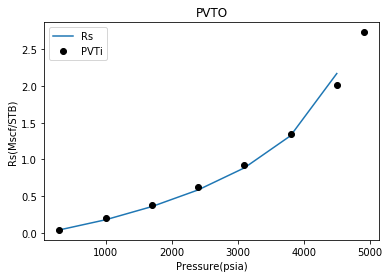

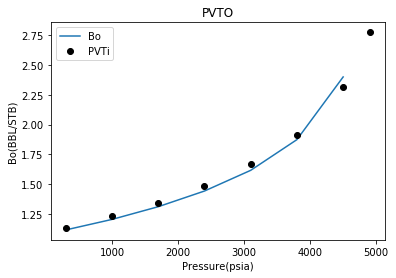

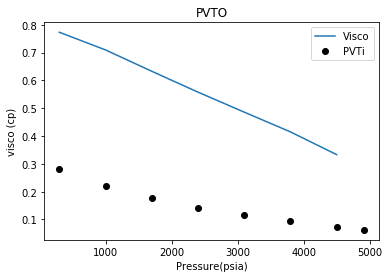

In [34]:
P_obs=    [300   ,1000    ,1700   ,2400  ,3100 ,3800,  4500,  4909 ]
Rs_obs=   [0.0433, 0.1949, 0.3845, 0.6199,0.923,1.3426,2.0148,2.7342]
Bo_obs=   [1.1352,1.2318,1.3458,1.4843,1.6688,1.9097,2.3177,2.7732]
visco_obs=[0.282,0.2207,0.1768,0.143,0.1161,0.0938,0.0742,0.0624]

plt.plot(PVTO_s['Pressure(psia)'],PVTO_s['Rs(Mscf/STB)'],label='Rs')
plt.plot(P_obs, Rs_obs, marker='o',color='black',linewidth=0,label='PVTi')

plt.xlabel('Pressure(psia)')
plt.ylabel('Rs(Mscf/STB)')
plt.title ('PVTO')
plt.legend()
plt.show()

plt.plot(PVTO_s['Pressure(psia)'],PVTO_s['Bo(BBL/STB)'],label='Bo')
plt.plot(P_obs, Bo_obs, marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure(psia)')
plt.ylabel('Bo(BBL/STB)')
plt.title ('PVTO')
plt.legend()
plt.show()

plt.plot(PVTO_s['Pressure(psia)'],PVTO_s['visco(cp)'],label='Visco')
plt.plot(P_obs, visco_obs,marker='o',color='black',linewidth=0,label='PVTi')
plt.xlabel('Pressure(psia)')
plt.ylabel('visco (cp)')
plt.title ('PVTO')
plt.legend()
plt.show()


In [ ]:

visc_liq_list=[]
visc_vap_list=[]
#
visc_liq_us_list=[]
for P in P_list:
  print ("Pressure=",P)
  visc_liq,visc_vap,visc_liq_us=lbc_visc(P,T_res,z1)
  visc_liq_list.append(visc_liq)
  visc_vap_list.append(visc_vap)
  visc_liq_us_list.append(visc_liq_us)

  
 

In [ ]:
#------Complicated Separator----------
z1= [0.2, 0.4, 0.25, 0.15]
#z1=[0.19, 0.31, 0.38, 0.12]
#initializing the values
moles_V1=0.1

moles_V2=0.0
moles_V3=0.0
moles_V4=0.0
moles_L1=0.1
moles_L2=0.0
moles_L3=0.0
moles_L4=0.0
output_moles=0.0
#y3 initialized as it only is available for Separator 2 in second iteration
y3=[0,0,0,0]
feed_sep2=[0,0,0,0]
 
iter=1
#while abs((1+moles_L4)/(moles_L1+moles_V1)-1.0)>0.01 and iter<=100:
while abs (1-output_moles)>0.01 and iter<=20:
 print ('iter=',iter)
 print ('z1=',z1)
#--Sep 1---
 x1,y1,L1,V1,zeta_l1,liq_v1,zeta_v1,vap_v1=workflow(1750,160, z1)
 moles_L1=(1+moles_L4)*L1
 moles_V1=(1+moles_L4)*V1
 print ('Sep 1')
 print('x1=',x1,) 
 print('y1=',y1)
 print ('L1=',L1,'V1=',V1)
 print('moles_L1=',moles_L1,'moles_V1=',moles_V1)
#---feed composition for Sep 2 ---
 for i in range (0,len(z1)):
    feed_sep2[i]=(y1[i]*moles_V1+y3[i]*moles_V3)/(moles_V1+moles_V3)
 print ('moles_V1=',moles_V1,'moles_V3=',moles_V3)
 print ('feed_sep2=',feed_sep2)
#--Sep 2-------
 x2,y2,L2,V2,zeta_l2,liq_v2,zeta_v2,vap_v2=workflow(100,-150,feed_sep2)
 moles_V2=(moles_V1+moles_V3)*V2
 moles_L2=(moles_V1+moles_V3)*L2
 print ('Sep 2')
 print('x2=',x2)
 print('y2=',y2)
 print ('L2=',L2,'V2=',V2)
 print('moles_L2=',moles_L2,'moles_V2=',moles_V2)
#--Sep 3 ------
 x3,y3,L3,V3,zeta_l3,liq_v3,zeta_v3,vap_v3=workflow(100,70,x1)
 moles_V3=moles_L1*V3
 moles_L3=moles_L1*L3
 print ('Sep 3')
 print('x3=',x3)
 print ('y3=',y3)
 print ('L3=',L3,'V3=',V3)
 print('moles_L3=',moles_L3,'moles_V3=',moles_V3)
#--Sep 4-------
 x4,y4,L4,V4,zeta_l4,liq_v4,zeta_v4,vap_v4=workflow(100,60,x2)
 moles_V4=moles_L2*V4
 moles_L4=moles_L2*L4
 print ('Sep 4')
 print('x4=',x4) 
 print('y4=',y4)
 print ('L4=',L4,'V4=',V4)
 print('moles_L4=',moles_L4,'moles_V4=',moles_V4)
    
 output_moles=moles_V2+moles_V4+moles_L3
 print ('output_moles=',output_moles)
#---feed composition for Sep 1 ---
 for i in range (0,len(z1)):
    z1[i]=(z1[i]+moles_L4*x4[i])/(1+moles_L4)
 print ('z1=',z1)
 iter=iter+1

    

  